In [386]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

## Data Exploring

In [387]:
df = pd.read_csv("car_price_prediction.csv")

***Import Data***

***(From Kaggle :"https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge")***

In [388]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


***Explore Data***

***1. ID doesn't use***

***2. 'Levy' has unlogic value '-'***

***3. 'Mileage', 'Engine volume' can change to number***

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

***Explore Data information***

***1. Data has number and object type***

***2. Non-null data***



In [390]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


***Explore statistic of Data***

***1. Has outlier (eg. max value of Airbags > 3std of Airbags)***


In [391]:
df.duplicated().sum()

313

***Explore duplicates data***

***1. There are 313 duplicates in data***


In [392]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

***'Levy' has unlogic value '-'***



In [393]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

***'Mileage' need to remove 'km'***

In [394]:
df['Engine volume'].value_counts() 

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

***'Engine volume' some value has a not numeric***

In [395]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

***04-May should be 4-5***
***02-Mar should be 2-3***

## Data Cleaning

In [396]:
df.drop(columns=["ID"], inplace=True)

***Drop ID feature***

In [397]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

***Convert 'Levy' column to numeric (nan if error)***

In [398]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

***Remove unnumberic in data from 'Mileage' and 'Engine volume' column***

In [399]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

***Convert (02-Mar to 2-3) and (04-May to 4-5)***

## Exploring Data Analysis

<AxesSubplot:xlabel='Levy', ylabel='Price'>

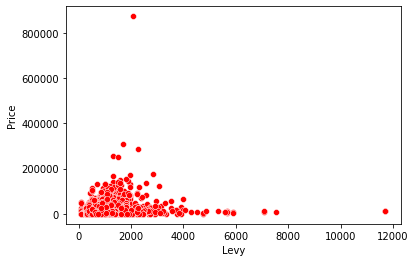

In [400]:
sns.scatterplot(data=df, x="Levy", y="Price", color='r')

Text(0.5, 1.0, '# of each Category')

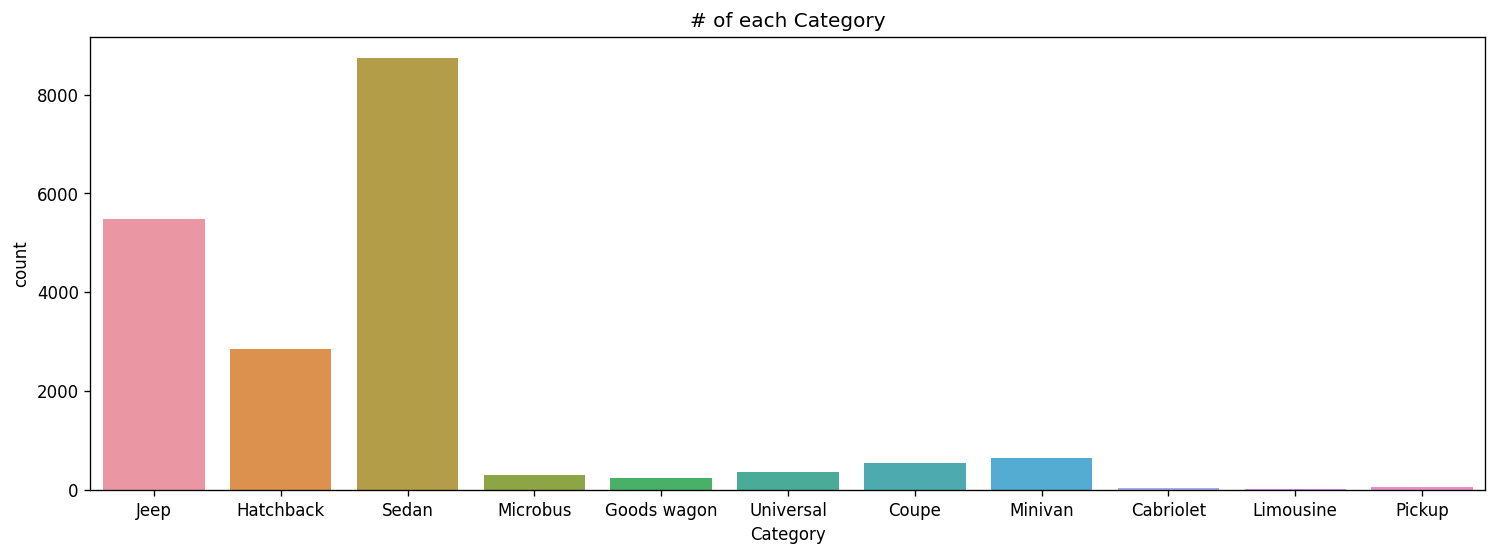

In [401]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

<AxesSubplot:xlabel='Airbags', ylabel='Density'>

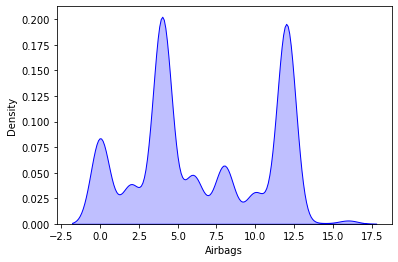

In [402]:
sns.kdeplot(df['Airbags'], color='b', shade=True)

<AxesSubplot:xlabel='Prod. year', ylabel='Count'>

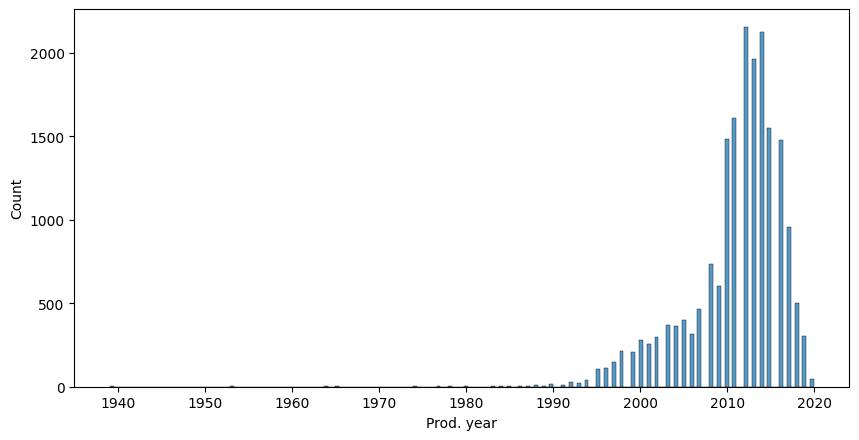

In [403]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

<AxesSubplot:xlabel='Engine volume', ylabel='Density'>

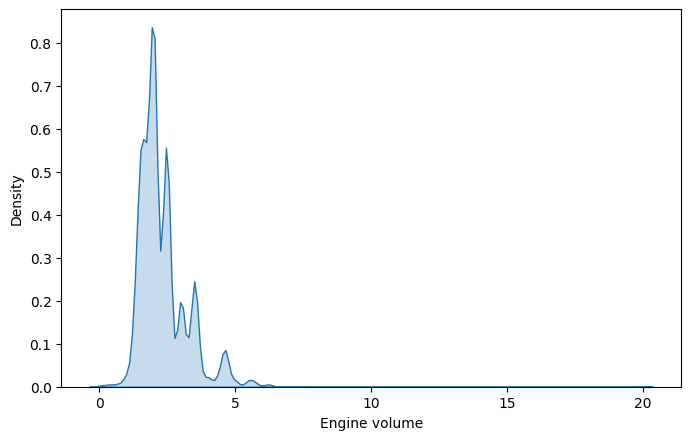

In [404]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

Text(0.5, 1.0, '# of colors')

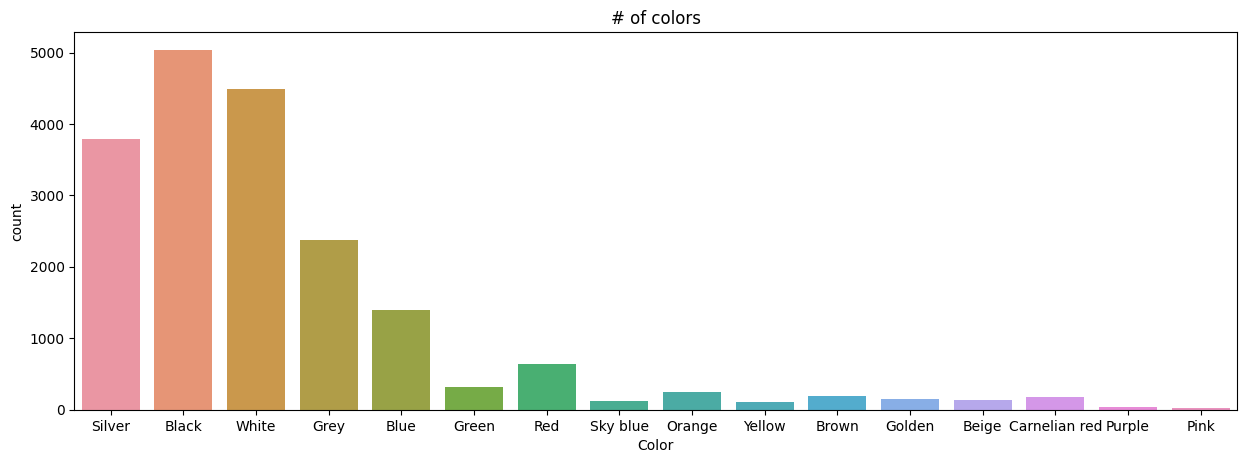

In [405]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("# of colors")

<AxesSubplot:xlabel='Doors', ylabel='count'>

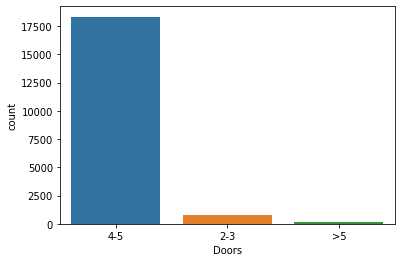

In [406]:
sns.countplot(data=df, x='Doors')

## Continue Data Cleaning

In [407]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

***Drop Duplicates***

In [408]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

***Reset Index***

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15725 entries, 0 to 15724
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              10041 non-null  float64
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Prod. year        15725 non-null  int64  
 5   Category          15725 non-null  object 
 6   Leather interior  15725 non-null  object 
 7   Fuel type         15725 non-null  object 
 8   Engine volume     15725 non-null  float64
 9   Mileage           15725 non-null  float64
 10  Cylinders         15725 non-null  float64
 11  Gear box type     15725 non-null  object 
 12  Drive wheels      15725 non-null  object 
 13  Doors             15725 non-null  object 
 14  Wheel             15725 non-null  object 
 15  Color             15725 non-null  object 
 16  Airbags           15725 non-null  int64 

***Explore data***

***1. Levy has null***

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Levy'>

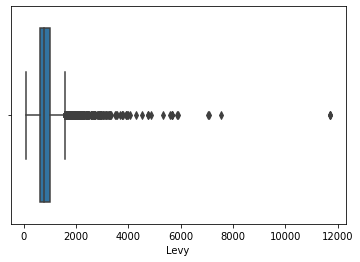

In [410]:
sns.boxplot(df['Levy'])

***Explore Levy***

***Decition to fillna of 'Levy' with Median***

In [411]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)

***Fill null in 'Levy' with median***

In [412]:
outlier_features = df.select_dtypes("number").columns
for feature in outlier_features:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)


  for i in range(df.shape[0]):
          if df[feature][i] < lower_bound:
              df[feature][i] = None
          elif df[feature][i] > upper_bound:
              df[feature][i] = None

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16188/1702768698.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = None
/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16188/1702768698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = None


<AxesSubplot:>

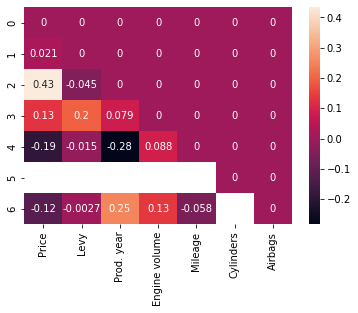

In [413]:
lower = pd.DataFrame(np.tril(df.corr(), -1), columns=df.corr().columns)
sns.heatmap(lower, annot=True)

In [414]:
df.drop(columns=["Cylinders"], inplace=True)

***Drop 'Cylinderes'***

***Data in Cylinderes is all same (data=4) so -> drop it***

In [415]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [416]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,8467.0,779.0,17,340,2006.0,3,0,4,1.3,200000.0,3,1,1,1,1,2
1,3607.0,862.0,13,329,2011.0,4,1,2,2.5,168966.0,0,0,1,0,14,0
2,39493.0,891.0,18,655,2016.0,4,1,1,2.0,160931.0,0,1,1,0,14,4
3,1803.0,761.0,44,595,2010.0,3,1,2,1.8,258909.0,0,1,1,0,14,12
4,549.0,751.0,18,672,2013.0,8,1,4,2.4,216118.0,0,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,470.0,645.0,44,595,2011.0,3,1,2,1.8,307325.0,0,1,1,0,12,12
8397,8467.0,779.0,28,174,1999.0,1,1,0,2.0,300000.0,1,2,0,0,12,5
8398,15681.0,831.0,18,672,2011.0,8,1,4,2.4,161600.0,2,1,1,0,11,8
8399,26108.0,836.0,18,745,2010.0,4,1,1,2.0,116365.0,0,1,1,0,7,4


***Select columns that type is object***

***then do LabelEncoder***

In [417]:
df.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.00000,8401.000000,8401.000000,8401.000000
mean,16396.422093,761.684204,26.385430,442.448161,2011.140340,5.758124,0.622783,2.897155,1.926794,126496.386740,0.611356,0.965599,0.97286,0.104988,8.240924,6.256993
std,10976.184836,94.999035,13.590035,215.138904,4.468242,2.333618,0.484719,1.333146,0.358110,73420.088309,0.970154,0.396271,0.19875,0.306556,5.259893,3.802570
min,1.000000,574.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,8467.000000,707.000000,18.000000,268.000000,2009.000000,4.000000,0.000000,2.000000,1.600000,71886.000000,0.000000,1.000000,1.00000,0.000000,2.000000,4.000000
50%,15323.000000,779.000000,22.000000,448.000000,2012.000000,6.000000,1.000000,4.000000,2.000000,122000.000000,0.000000,1.000000,1.00000,0.000000,11.000000,4.000000
75%,21972.000000,779.000000,42.000000,632.000000,2014.000000,8.000000,1.000000,4.000000,2.000000,172125.000000,1.000000,1.000000,1.00000,0.000000,13.000000,10.000000
max,47107.000000,1036.000000,49.000000,827.000000,2020.000000,9.000000,1.000000,5.000000,3.600000,350070.000000,3.000000,2.000000,2.00000,1.000000,15.000000,16.000000


## Continue Exploring Data Analysis

<AxesSubplot:xlabel='Levy', ylabel='Price'>

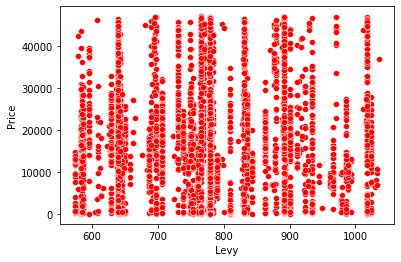

In [418]:
sns.scatterplot(data=df, x="Levy", y="Price", color='r')

<AxesSubplot:xlabel='Prod. year', ylabel='Count'>

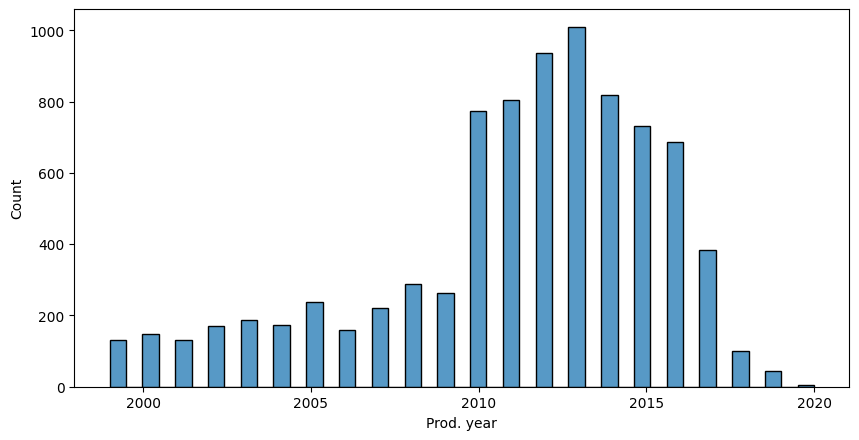

In [419]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

<AxesSubplot:xlabel='Engine volume', ylabel='Density'>

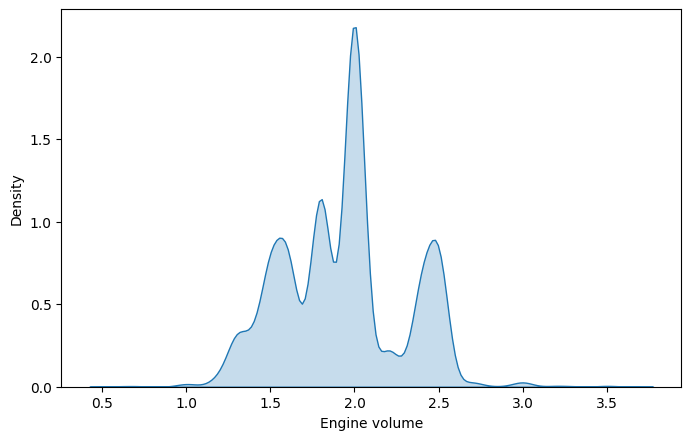

In [420]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

## Linear Regression

In [421]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,8467.0,779.0,17,340,2006.0,3,0,4,1.3,200000.0,3,1,1,1,1,2
1,3607.0,862.0,13,329,2011.0,4,1,2,2.5,168966.0,0,0,1,0,14,0
2,39493.0,891.0,18,655,2016.0,4,1,1,2.0,160931.0,0,1,1,0,14,4
3,1803.0,761.0,44,595,2010.0,3,1,2,1.8,258909.0,0,1,1,0,14,12
4,549.0,751.0,18,672,2013.0,8,1,4,2.4,216118.0,0,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,470.0,645.0,44,595,2011.0,3,1,2,1.8,307325.0,0,1,1,0,12,12
8397,8467.0,779.0,28,174,1999.0,1,1,0,2.0,300000.0,1,2,0,0,12,5
8398,15681.0,831.0,18,672,2011.0,8,1,4,2.4,161600.0,2,1,1,0,11,8
8399,26108.0,836.0,18,745,2010.0,4,1,1,2.0,116365.0,0,1,1,0,7,4


In [422]:
# Split Data -> MinMaxScale -> Train_Test_Spilt

y = df.iloc[:, 0:1]
x = df.drop(['Price'], axis=1)
x = MinMaxScaler().fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)


In [423]:
# Train -> r2 -> reset_index -> trasform y_pred to list

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2 = r2_score(y_test,y_pred)
print("RSquare : ", r2)

# Reset index
y_test.reset_index(inplace=True)

# Transform y_pred
y_pred = [pred[0] for pred in y_pred]

RSquare :  0.33808584343556547


In [424]:
# Create new DataFraom for collect

prediction = y_test
prediction['Price_predict'] = pd.DataFrame(y_pred)
print(prediction)

      index    Price  Price_predict
0      4067   2587.0   12464.697838
1       681  10976.0    4742.190156
2        21   1411.0   21360.319874
3      1309  35902.0   27244.102897
4      8060  17942.0   22281.151427
...     ...      ...            ...
2516   7135  15900.0   14344.168467
2517   4046  23521.0   14016.672323
2518   8304   7527.0   16995.469339
2519   7161   9722.0   17765.002873
2520   2854  21012.0   15529.657472

[2521 rows x 3 columns]


In [425]:
# Find error_distance

distance = []
for i in range(prediction.shape[0]):
  distance.append(abs(prediction['Price'][i] - prediction['Price_predict'][i]))

prediction['distance'] = pd.DataFrame(distance)
print(prediction)


      index    Price  Price_predict      distance
0      4067   2587.0   12464.697838   9877.697838
1       681  10976.0    4742.190156   6233.809844
2        21   1411.0   21360.319874  19949.319874
3      1309  35902.0   27244.102897   8657.897103
4      8060  17942.0   22281.151427   4339.151427
...     ...      ...            ...           ...
2516   7135  15900.0   14344.168467   1555.831533
2517   4046  23521.0   14016.672323   9504.327677
2518   8304   7527.0   16995.469339   9468.469339
2519   7161   9722.0   17765.002873   8043.002873
2520   2854  21012.0   15529.657472   5482.342528

[2521 rows x 4 columns]


In [426]:
# Get top 10 error_distance
# By find index -> sort -> get top 10 -> get index of top 10 error

distance_with_id = [(i, distance[i]) for i in range(len(distance))]
sort_distance = sorted(distance_with_id, reverse=True, key=lambda x: x[1])
top_10_errors = [error[0] for error in sort_distance[:10]]
top_10_accurate = [error[0] for error in sort_distance[len(sort_distance):len(sort_distance)-20:-1]]
print("Top 10 errors index : ", top_10_errors)
print("Top 10 accurate index : ", top_10_accurate)

Top 10 errors index :  [1710, 498, 473, 1270, 982, 1402, 1881, 842, 678, 2057]
Top 10 accurate index :  [2001, 2242, 1527, 919, 173, 1360, 979, 721, 450, 1279, 1899, 278, 1513, 308, 1495, 1838, 1709, 1750, 1887]


In [427]:
# Filter top 10 error from df

top_10_errors = pd.DataFrame(df, index=top_10_errors)
top_10_errors

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1710,25889.0,730.0,18,310,2016.0,8,1,4,1.6,63276.0,0,1,1,0,14,4
498,6586.0,779.0,31,558,2003.0,4,0,0,2.4,156564.0,0,0,1,0,2,4
473,12513.0,769.0,22,218,2011.0,6,1,1,2.2,100842.0,0,1,1,0,14,4
1270,3293.0,586.0,17,228,2012.0,8,1,4,1.8,124509.0,0,1,1,0,14,12
982,14740.0,779.0,44,595,2008.0,3,1,2,1.5,193000.0,0,1,1,0,12,12
1402,18189.0,769.0,6,215,2011.0,4,1,1,2.2,70479.0,0,1,1,0,7,4
1881,36827.0,640.0,18,655,2013.0,4,1,1,2.0,171755.0,0,1,1,0,12,4
842,23521.0,779.0,44,595,2013.0,3,0,2,1.8,169600.0,0,1,1,0,12,4
678,20636.0,640.0,18,745,2013.0,4,1,1,2.0,64259.0,0,1,1,0,7,4
2057,22580.0,749.0,22,548,2014.0,8,1,4,2.4,47000.0,2,1,1,0,1,6


In [428]:
top_10_accurate = pd.DataFrame(df, index=top_10_accurate)
top_10_accurate

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2001,941.0,584.0,18,310,2014.0,8,1,4,1.8,101526.0,0,1,1,0,12,12
2242,45.0,779.0,17,340,2007.0,3,0,4,1.3,87000.0,0,1,1,1,1,5
1527,31248.0,751.0,21,240,2013.0,4,1,4,2.4,59897.0,0,1,1,0,14,4
919,4234.0,779.0,44,200,2013.0,8,1,2,2.5,26918.0,0,1,1,0,14,12
173,37000.0,891.0,18,745,2016.0,4,1,1,2.0,80000.0,0,1,1,0,12,4
1360,11917.0,779.0,44,595,2007.0,8,0,2,1.5,318400.0,0,1,1,0,13,5
979,39750.0,730.0,41,91,2016.0,4,1,1,1.6,72000.0,0,1,1,0,11,4
721,8000.0,779.0,31,233,2006.0,3,0,4,1.5,169969.0,0,1,1,1,12,2
450,10036.0,779.0,3,31,2002.0,8,0,1,2.0,280000.0,1,2,1,0,1,8
1279,282.0,584.0,47,448,2014.0,8,1,4,1.8,35494.0,0,1,1,0,1,12


## SVR lin


In [429]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import metrics
Num_fold = 3
Seed = 20
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)

In [430]:
x_train_SVRlin, x_test_SVRlin, y_train_SVRlin, y_test_SVRlin = train_test_split(x, y, test_size=0.3, random_state=5)

In [431]:
score_lin = model_selection.cross_val_score(svr_lin, x_train_SVRlin, y_train_SVRlin, cv=kfold)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [432]:
SVR_Linear = svr_lin.fit(x_train_SVRlin,y_train_SVRlin).predict(x_test_SVRlin)
SVR_Linear

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([15858.9486172 ,  8077.73457876, 19304.45274283, ...,
       17663.22330759, 17978.40684307, 16895.31581562])

In [433]:
SVR_linear_r2 = metrics.r2_score(y_test_SVRlin, SVR_Linear)
SVR_linear_r2

0.28683880775136295

## KNN

In [434]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [435]:
rating_pctile = np.percentile( y, [25,50,75])
priceRange = []
NSamples = [0,0,0,0]
for i in y.values:
    if i < rating_pctile [0]: #25 percentile
        NSamples[0] += 1
        priceRange.append(1)
    if rating_pctile [0] <= i < rating_pctile [1]: # 50 percentile
        NSamples[1] += 1
        priceRange.append(2)
    if rating_pctile [1] <= i < rating_pctile [2]: # 75 percentile
        NSamples[2] += 1
        priceRange.append(3)
    if i >= rating_pctile[2]:
        NSamples[3] += 1
        priceRange.append(4) 
y["Price"] = priceRange


In [436]:
x_trainKNN, x_testKNN, y_trainKNN, y_testKNN = train_test_split(x, y, test_size=0.3, random_state=5)

In [437]:
modelKNN = KNeighborsClassifier(n_neighbors=5, p=2)
modelKNN.fit(x_trainKNN,y_trainKNN)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [438]:
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
y_predKNN = modelKNN.predict(x_testKNN)
KNNScore = accuracy_score(y_testKNN, y_predKNN)
KNNScore

0.6148353827846093

In [439]:
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN, y_predKNN))
print('Classification Report: ')
print(classification_report(y_testKNN, y_predKNN))

Confusion Matrix: 
[[479 106  46  23]
 [109 346 143  19]
 [ 63 141 326  99]
 [ 43  41 138 399]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       654
           2       0.55      0.56      0.55       617
           3       0.50      0.52      0.51       629
           4       0.74      0.64      0.69       621

    accuracy                           0.61      2521
   macro avg       0.62      0.61      0.61      2521
weighted avg       0.62      0.61      0.62      2521



## Decision Tree

In [440]:
from sklearn.ensemble import RandomForestClassifier
ASM_function = ['entropy', 'gini']
maxD = [4, 5, 6, None]

In [441]:
ModelDT1 = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth = 4 )
ModelDT2 = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth = 5 )
ModelDT3 = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 4 )
ModelDT4 = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 5 )
ModelDT1.fit(x_trainKNN,y_trainKNN)
ModelDT2.fit(x_trainKNN,y_trainKNN)
ModelDT3.fit(x_trainKNN,y_trainKNN)
ModelDT4.fit(x_trainKNN,y_trainKNN)

DecisionTreeClassifier(max_depth=5)

In [442]:
y_pred1 = ModelDT1.predict(x_testKNN)
DTScore1 = accuracy_score(y_testKNN, y_pred1)
print(DTScore1)

0.5624752082506942


In [443]:
y_pred2 = ModelDT2.predict(x_testKNN)
DTScore2 = accuracy_score(y_testKNN, y_pred2)
print(DTScore2)

0.5834986116620389


In [444]:
y_pred3 = ModelDT3.predict(x_testKNN)
DTScore3 = accuracy_score(y_testKNN, y_pred3)
print(DTScore3)

0.5513685045616818


In [445]:
y_pred4 = ModelDT4.predict(x_testKNN)
DTScore4 = accuracy_score(y_testKNN, y_pred4)
print(DTScore4)

0.6005553351844506


In [446]:
# Print Confusion Matrix and Classification Report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN, y_pred2))
print('Classification Report: ')
print(classification_report(y_testKNN, y_pred2))

Confusion Matrix: 
[[467 107  73   7]
 [ 89 230 278  20]
 [ 48  40 441 100]
 [ 35  18 235 333]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.71      0.72       654
           2       0.58      0.37      0.45       617
           3       0.43      0.70      0.53       629
           4       0.72      0.54      0.62       621

    accuracy                           0.58      2521
   macro avg       0.62      0.58      0.58      2521
weighted avg       0.62      0.58      0.58      2521



## Random Forest

In [447]:
from sklearn.ensemble import RandomForestClassifier
ASM_function = ['entropy','gini']
nEstimator = 100 
nJob = 2
rState = 10

In [448]:
RandomF = RandomForestClassifier(criterion = 'entropy',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF1 = RandomForestClassifier(criterion = 'gini',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF.fit(x_trainKNN,y_trainKNN)
RandomF1.fit(x_trainKNN,y_trainKNN)

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16188/1289516863.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF.fit(x_trainKNN,y_trainKNN)
/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16188/1289516863.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF1.fit(x_trainKNN,y_trainKNN)


RandomForestClassifier(n_jobs=2, random_state=10)

In [449]:
#Model Testing
y_predRF1 = RandomF.predict(x_testKNN)
RFScore1 = accuracy_score(y_testKNN,y_predRF1)
RFScore1

0.7140023800079334

In [450]:
y_predRF2 = RandomF1.predict(x_testKNN)
RFScore2 = accuracy_score(y_testKNN,y_predRF2)
RFScore2

0.7151923839746133

In [451]:
#print confusion matrix and classification report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN,y_predRF1))
print('Classification Report: ')
print(classification_report(y_testKNN,y_predRF1))

Confusion Matrix: 
[[528  86  21  19]
 [ 94 394 118  11]
 [ 29  98 419  83]
 [ 27  17 118 459]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.78      0.81      0.79       654
           2       0.66      0.64      0.65       617
           3       0.62      0.67      0.64       629
           4       0.80      0.74      0.77       621

    accuracy                           0.71      2521
   macro avg       0.72      0.71      0.71      2521
weighted avg       0.72      0.71      0.71      2521



## GridSearch Classification

In [452]:
from sklearn.model_selection import GridSearchCV
classification = {'KNN':KNeighborsClassifier(),'DT':DecisionTreeClassifier(),'RF':RandomForestClassifier()}

In [453]:
#Create Parameter Dicitonary for KNN
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,35,45]
KNN_param = dict(n_neighbors = K_list)
KNN_param

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 35, 45]}

In [454]:
#Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy','gini','log_loss']
maxD = [4,5,6,None]
maxF =['auto','log2',None,'sqrt']
minSample = [1,2,4]
DT_param = dict(criterion = ASM_function,max_depth = maxD,min_samples_leaf = minSample,max_features = maxF)

In [455]:
#Create Parameter Dictionary for Random Forest
nEst = [10,30,50,100]
RF_param = dict(n_estimators = nEst,criterion = ASM_function,max_depth = maxD,min_samples_leaf= minSample,max_features = maxF)

In [456]:
for EST in classification:
    model = classification[EST]
    if EST == 'KNN':
        param = KNN_param
    elif EST == 'DT':
        param = DT_param
    else:
        param = RF_param
    grid = GridSearchCV(estimator = model,
                        n_jobs=8,
                        verbose=10,
                        scoring='accuracy',
                        cv=5,
                        param_grid=param)
    grid_result = grid.fit(x_trainKNN,y_trainKNN)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 3/5; 2/14] START n_neighbors=3..............................................
[CV 3/5; 1/14] START n_neighbors=1..............................................
[CV 4/5; 1/14] START n_neighbors=1..............................................[CV 1/5; 1/14] START n_neighbors=1..............................................[CV 5/5; 1/14] START n_neighbors=1..............................................


[CV 1/5; 2/14] START n_neighbors=3..............................................
[CV 2/5; 2/14] START n_neighbors=3..............................................
[CV 2/5; 1/14] START n_neighbors=1..............................................
[CV 2/5; 1/14] END ...............n_neighbors=1;, score=0.610 total time=   0.0s
[CV 3/5; 1/14] END ...............n_neighbors=1;, score=0.589 total time=   0.0s
[CV 1/5; 1/14] END ...............n_neighbors=1;, score=0.600 total time=   0.0s
[CV 1/5; 2/14] END ...............n_neighbors=3;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

[CV 1/5; 7/14] START n_neighbors=13.............................................
[CV 4/5; 5/14] END ...............n_neighbors=9;, score=0.595 total time=   0.1s
[CV 5/5; 5/14] END ...............n_neighbors=9;, score=0.590 total time=   0.1s
[CV 2/5; 7/14] START n_neighbors=13.............................................
[CV 1/5; 6/14] END ..............n_neighbors=11;, score=0.595 total time=   0.1s
[CV 2/5; 6/14] END ..............n_neighbors=11;, score=0.589 total time=   0.1s
[CV 3/5; 7/14] START n_neighbors=13.............................................
[CV 3/5; 6/14] END ..............n_neighbors=11;, score=0.595 total time=   0.1s
[CV 4/5; 7/14] START n_neighbors=13.............................................
[CV 4/5; 6/14] END ..............n_neighbors=11;, score=0.606 total time=   0.1s
[CV 5/5; 7/14] START n_neighbors=13.............................................
[CV 5/5; 6/14] END ..............n_neighbors=11;, score=0.587 total time=   0.1s
[CV 1/5; 8/14] START n_neigh

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

[CV 1/5; 11/14] END .............n_neighbors=21;, score=0.582 total time=   0.1s
[CV 2/5; 11/14] START n_neighbors=21............................................
[CV 3/5; 13/14] START n_neighbors=35............................................
[CV 5/5; 11/14] END .............n_neighbors=21;, score=0.573 total time=   0.1s
[CV 1/5; 12/14] START n_neighbors=23............................................
[CV 2/5; 12/14] END .............n_neighbors=23;, score=0.582 total time=   0.1s
[CV 3/5; 12/14] START n_neighbors=23............................................
[CV 3/5; 11/14] END .............n_neighbors=21;, score=0.584 total time=   0.1s
[CV 4/5; 11/14] START n_neighbors=21............................................
[CV 5/5; 10/14] END .............n_neighbors=19;, score=0.575 total time=   0.1s
[CV 4/5; 12/14] END .............n_neighbors=23;, score=0.601 total time=   0.1s
[CV 5/5; 12/14] START n_neighbors=23............................................
[CV 5/5; 13/14] START n_neig

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 2/5; 1/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 1/5; 1/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 2/5; 1/144] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.451 total time=   0.0s
[CV 1/5; 1/144] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1;, score=0.449 total time=   0.0s
[CV 1/5; 2/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2
[CV 3/5; 1/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 4/5; 1/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 5/5; 1/144] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1
[CV 1/5; 2/144] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2;, score=0.467 total time=   0.0s
[CV 2/5; 2/144] 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

[CV 5/5; 37/144] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1;, score=0.604 total time=   0.0s
[CV 1/5; 38/144] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2
[CV 5/5; 36/144] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4;, score=0.495 total time=   0.0s
[CV 1/5; 37/144] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1
[CV 3/5; 35/144] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2;, score=0.423 total time=   0.0s
[CV 4/5; 35/144] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2
[CV 3/5; 39/144] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4;, score=0.599 total time=   0.0s
[CV 4/5; 39/144] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4
[CV 4/5; 35/144] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2;, score=0.538 total time= 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

[CV 5/5; 67/144] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1;, score=0.559 total time=   0.0s
[CV 1/5; 68/144] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2
[CV 2/5; 45/144] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4;, score=0.611 total time=   0.0s
[CV 3/5; 45/144] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4
[CV 4/5; 76/144] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1;, score=0.569 total time=   0.0s
[CV 5/5; 76/144] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1
[CV 5/5; 78/144] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4;, score=0.497 total time=   0.0s
[CV 1/5; 79/144] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1
[CV 5/5; 76/144] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1;, score=0.560 total time=   0.0s
[CV 1/5; 77/144] START 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

[CV 2/5; 116/144] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2
[CV 4/5; 92/144] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2;, score=0.628 total time=   0.0s
[CV 5/5; 92/144] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2
[CV 1/5; 115/144] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1;, score=0.571 total time=   0.0s
[CV 2/5; 115/144] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1
[CV 4/5; 116/144] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2
[CV 3/5; 115/144] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1;, score=0.564 total time=   0.0s
[CV 4/5; 115/144] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1
[CV 1/5; 117/144] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4
[CV 2/5; 116/144] END criterion=log_loss, max_depth=5, m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'

[CV 2/5; 142/144] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1;, score=0.619 total time=   0.0s
[CV 3/5; 142/144] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1
[CV 1/5; 139/144] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1;, score=0.601 total time=   0.1s
[CV 2/5; 139/144] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1
[CV 2/5; 141/144] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4;, score=0.612 total time=   0.0s
[CV 4/5; 142/144] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1
[CV 3/5; 142/144] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1;, score=0.589 total time=   0.0s
[CV 4/5; 142/144] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1;, score=0.588 total time=   0.0s
[CV 5/5; 142/144] START criterion=log_loss, max_depth=None, m

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 4/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 2/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.578 total time=   0.1s
[CV 2/5; 4/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 2/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.595 total time=   0.1s
[CV 4/5; 4/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 3/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.584 total time=   0.1s
[CV 3/5; 3/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.594 total time=   0.1s
[CV 1/5; 5/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 6/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.599 total time=   0.1s
[CV 5/5; 6/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/5; 6/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 6/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 7/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.629 total time=   0.1s
[CV 2/5; 7/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/5; 4/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.628 total time=   0.3s
[CV 3/5; 7/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, sco

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 9/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.571 total time=   0.0s
[CV 1/5; 10/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 4/5; 9/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.581 total time=   0.0s
[CV 4/5; 10/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/5; 10/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.585 total time=   0.1s
[CV 3/5; 10/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/5; 8/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.595 total time=   0.2s
[CV 3/5; 8/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 11/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.577 total time=   0.1s
[CV 1/5; 12/576] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 3/5; 13/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.577 total time=   0.0s
[CV 4/5; 13/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 4/5; 13/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.595 total time=   0.0s
[CV 5/5; 13/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 13/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.522 total time=   0.0s
[CV 1/5; 14/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 14/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.590 total time=   0.1s
[CV 2/5; 16/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 15/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.612 total time=   0.2s
[CV 2/5; 15/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 1/5; 12/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.613 total time=   0.3s
[CV 4/5; 16/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 5/5; 14/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.577 total time=   0.1s
[CV 1/5; 17/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 18/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 5/5; 12/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.564 total time=   0.3s
[CV 5/5; 17/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.562 total time=   0.0s
[CV 1/5; 18/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 4/5; 15/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.598 total time=   0.1s
[CV 4/5; 18/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 19/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 3/5; 12/576] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.611 total time=  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 21/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.579 total time=   0.0s
[CV 2/5; 19/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.589 total time=   0.1s
[CV 3/5; 21/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 5/5; 21/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 3/5; 21/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.554 total time=   0.0s
[CV 4/5; 21/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 4/5; 19/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 5/5; 21/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 16/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.564 total time=   0.3s
[CV 4/5; 20/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.599 total time=   0.3s
[CV 5/5; 20/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 3/5; 23/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 1/5; 22/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.616 total time=   0.2s
[CV 5/5; 23/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 4/5; 22/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.596 total time=   0.2s
[CV 5/5; 22/576] START criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 20/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.598 total time=   0.3s
[CV 3/5; 25/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 5/5; 25/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 25/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.569 total time=   0.1s
[CV 2/5; 26/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 4/5; 23/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.604 total time=   0.1s
[CV 4/5; 26/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 5/5; 20/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.577 total time=  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 26/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.567 total time=   0.2s
[CV 5/5; 26/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 2/5; 26/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.567 total time=   0.2s
[CV 3/5; 26/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 26/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.579 total time=   0.2s
[CV 2/5; 28/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 24/576] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.581 total time=   0.2s
[CV 4/5; 28/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 29/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 29/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.583 total time=   0.1s
[CV 2/5; 29/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 27/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.553 total time=   0.3s
[CV 4/5; 27/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 5/5; 27/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.527 total time=   0.3s
[CV 1/5; 28/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 29/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.546 total time=   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 30/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.585 total time=   0.2s
[CV 1/5; 31/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 27/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.564 total time=   0.3s
[CV 3/5; 31/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 30/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.576 total time=   0.2s
[CV 3/5; 30/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 4/5; 27/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.572 total time=   0.3s
[CV 5/5; 31/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 30/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.554 total time=   0.2s
[CV 2/5; 32/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 28/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.580 total time=   0.6s
[CV 3/5; 28/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 30/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.526 total time=   0.2s
[CV 4/5; 32/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 4/5; 28/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.568 total time=   0.6s
[CV 5/5; 28/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estim

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 33/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 33/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.585 total time=   0.1s
[CV 2/5; 33/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 33/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.577 total time=   0.0s
[CV 3/5; 33/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 3/5; 33/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.558 total time=   0.1s
[CV 4/5; 33/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 31/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.570 total time=   0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 33/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.565 total time=   0.1s
[CV 5/5; 33/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.549 total time=   0.1s
[CV 1/5; 34/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 34/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 34/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.591 total time=   0.1s
[CV 3/5; 34/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 32/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.582 total time=   0.6s
[CV 3/5; 32/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 35/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 28/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.520 total time=   0.6s
[CV 5/5; 35/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 32/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.587 total time=   0.5s
[CV 2/5; 36/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 3/5; 34/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.559 total time=   0.2s
[CV 4/5; 36/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 34/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.527 total time=   0.2s
[CV 1/5; 37/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 37/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.597 total time=   0.0s
[CV 2/5; 37/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 2/5; 37/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.572 total time=   0.0s
[CV 3/5; 37/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 37/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.585 total time=   0.0s
[CV 4/5; 37/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 38/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.592 total time=   0.1s
[CV 3/5; 38/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 38/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.589 total time=   0.1s
[CV 3/5; 32/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.553 total time=   0.7s
[CV 4/5; 38/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 1/5; 39/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 35/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.568 total time=   0.3s
[CV 3/5; 39/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 40/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 36/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.571 total time=   0.7s
[CV 5/5; 36/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 39/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.600 total time=   0.1s
[CV 2/5; 39/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 36/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.573 total time=   0.7s
[CV 3/5; 36/576] START criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 3/5; 39/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.594 total time

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 41/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.576 total time=   0.0s
[CV 4/5; 41/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 2/5; 41/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.580 total time=   0.0s
[CV 2/5; 40/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.594 total time=   0.2s
[CV 3/5; 40/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 41/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 5/5; 41/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.556 total time=   0.0s
[CV 1/5; 42/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 36/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.582 total time=   0.7s
[CV 3/5; 43/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 42/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.578 total time=   0.1s
[CV 5/5; 42/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.567 total time=   0.1s
[CV 5/5; 43/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 2/5; 44/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 43/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.603 total time=   0.1s
[CV 2/5; 43/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 36/576] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.526 total time=   0.6s
[CV 2/5; 45/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.571 total time=   0.0s
[CV 5/5; 45/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 2/5; 46/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 4/5; 43/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.601 total time=   0.1s
[CV 4/5; 46/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 45/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.584 total time=   0.0s
[CV 4/5; 45/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 49/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.608 total time=   0.0s
[CV 2/5; 49/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 47/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.594 total time=   0.1s
[CV 4/5; 47/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 2/5; 49/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.599 total time=   0.0s
[CV 5/5; 47/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.567 total time=   0.1s
[CV 1/5; 48/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 3/5; 49/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 48/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.605 total time=   0.2s
[CV 5/5; 48/576] START criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/5; 48/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.610 total time=   0.2s
[CV 2/5; 52/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 51/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.616 total time=   0.1s
[CV 4/5; 51/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 50/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.618 total time=   0.1s
[CV 4/5; 52/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estima

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 48/576] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.605 total time=   0.2s
[CV 4/5; 53/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.577 total time=   0.0s
[CV 1/5; 55/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 3/5; 55/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/5; 54/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.626 total time=   0.1s
[CV 3/5; 54/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/5; 52/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.632 total time=   0.3s
[CV 3/5; 52/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 57/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.607 total time=   0.0s
[CV 3/5; 57/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 3/5; 57/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.577 total time=   0.0s
[CV 4/5; 57/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 55/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.621 total time=   0.1s
[CV 5/5; 57/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 4/5; 57/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.616 total time=   0.0s
[CV 4/5; 55/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 56/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.631 total time=   0.2s
[CV 2/5; 60/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 3/5; 58/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.614 total time=   0.1s
[CV 4/5; 60/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 1/5; 59/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.648 total time=   0.1s
[CV 2/5; 59/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 5/5; 58/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.599 total time=   0.2s
[CV 1/5; 61/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 59/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.617 total time=   0.2s
[CV 4/5; 59/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/5; 61/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.588 total time=   0.0s
[CV 3/5; 61/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 59/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.585 total time=   0.2s
[CV 1/5; 60/576] START criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 3/5; 61/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.589 total time=   0.0s
[CV 4/5; 61/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 62/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.615 total time=   0.1s
[CV 5/5; 62/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 3/5; 62/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.608 total time=   0.1s
[CV 2/5; 64/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 63/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.626 total time=   0.1s
[CV 2/5; 63/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 63/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.618 total time=   0.1s
[CV 4/5; 63/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 66/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 5/5; 60/576] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.587 total time=   0.2s
[CV 1/5; 67/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 3/5; 67/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 66/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.623 total time=   0.1s
[CV 3/5; 66/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 4/5; 66/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.626 total time=   0.1s
[CV 5/5; 66/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 66/576] END crite

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 68/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 69/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 2/5; 67/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.611 total time=   0.1s
[CV 3/5; 69/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 3/5; 69/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.602 total time=   0.0s
[CV 4/5; 69/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 4/5; 67/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.608 total time=   0.1s
[CV 5/5; 69/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 1/5; 69/576] END crite

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 70/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.578 total time=   0.1s
[CV 4/5; 72/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 2/5; 68/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.612 total time=   0.3s
[CV 3/5; 68/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 3/5; 71/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.621 total time=   0.1s
[CV 4/5; 71/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 4/5; 68/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.621 total time=   0.3s
[CV 5/5; 68/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, n_estima

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 73/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.589 total time=   0.1s
[CV 3/5; 73/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.611 total time=   0.1s
[CV 4/5; 73/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 74/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 2/5; 72/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.616 total time=   0.3s
[CV 3/5; 72/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 4/5; 72/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.609 total time=   0.3s
[CV 5/5; 72/576] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 72/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.609 total time=   0.2s
[CV 2/5; 76/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 72/576] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.588 total time=   0.2s
[CV 4/5; 76/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 74/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.612 total time=   0.2s
[CV 5/5; 74/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 74/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.619 total time=   0.4s
[CV 1/5; 77/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estima

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 78/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 77/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.553 total time=   0.1s
[CV 1/5; 78/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 78/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.603 total time=   0.2s
[CV 3/5; 78/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 75/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.605 total time=   0.3s
[CV 1/5; 79/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 1/5; 78/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.619 total time=   0.2s
[CV 3/5; 79/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 75/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.615 total time=   0.4s
[CV 5/5; 79/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 78/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.599 total time=   0.3s
[CV 5/5; 78/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 76/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 76/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.600 total time=   0.9s
[CV 5/5; 76/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 1/5; 79/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.613 total time=   0.4s
[CV 2/5; 79/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 79/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.4s
[CV 4/5; 79/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 79/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.576 total time=   0.4s
[CV 1/5; 80/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 78/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.580 total time=   0.4s
[CV 4/5; 80/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 76/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.619 total time=   0.9s
[CV 1/5; 81/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 81/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.617 total time=   0.1s
[CV 2/5; 81/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 81/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.599 total time=   0.1s
[CV 3/5; 81/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 79/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.599 total time=   0.4s
[CV 2/5; 79/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.610 total time=   0.4s
[CV 5/5; 81/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 82/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 81/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.599 total time=   0.1s
[CV 4/5; 82/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 80/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.613 total time=   0.8s
[CV 3/5; 80/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 76/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.579 total time=   0.8s
[CV 3/5; 76/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.598 total time=   0.8s
[CV 1/5; 83/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 3/5; 83/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estima

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 83/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.616 total time=   0.4s
[CV 2/5; 83/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 3/5; 83/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.611 total time=   0.4s
[CV 4/5; 83/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 82/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.580 total time=   0.2s
[CV 1/5; 85/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 85/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.588 total time=   0.0s
[CV 2/5; 85/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 86/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.625 total time=   0.1s
[CV 3/5; 80/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.594 total time=   0.7s
[CV 2/5; 86/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 86/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 83/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.614 total time=   0.4s
[CV 1/5; 87/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 86/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.623 total time=   0.1s
[CV 3/5; 86/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 88/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 87/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.622 total time=   0.1s
[CV 2/5; 87/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 84/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.603 total time=   0.7s
[CV 3/5; 84/576] START criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 3/5; 87/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.616 total time=   0.1s
[CV 4/5; 87/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 84/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.610 total time=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 89/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.618 total time=   0.0s
[CV 2/5; 89/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 4/5; 87/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.629 total time=   0.1s
[CV 3/5; 89/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 2/5; 89/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.594 total time=   0.0s
[CV 5/5; 89/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 89/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.588 total time=   0.0s
[CV 4/5; 89/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 90/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.632 total time=   0.1s
[CV 1/5; 84/576] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.625 total time=   0.8s
[CV 4/5; 90/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 2/5; 90/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.623 total time=   0.1s
[CV 3/5; 90/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 1/5; 88/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.644 total time=   0.3s
[CV 1/5; 91/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 91/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 91/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.601 total time=   0.2s
[CV 1/5; 92/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 2/5; 91/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.617 total time=   0.1s
[CV 1/5; 93/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 4/5; 91/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.612 total time=   0.1s
[CV 3/5; 93/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 1/5; 93/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.612 total time=   0.0s
[CV 2/5; 93/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 94/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.607 total time=   0.1s
[CV 3/5; 94/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 1/5; 94/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.633 total time=   0.1s
[CV 3/5; 95/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 4/5; 94/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.615 total time=   0.1s
[CV 5/5; 94/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 1/5; 92/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.629 total time=   0.2s
[CV 5/5; 95/576] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 97/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.645 total time=   0.0s
[CV 2/5; 97/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 5/5; 92/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.591 total time=   0.3s
[CV 3/5; 92/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.607 total time=   0.3s
[CV 3/5; 97/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 97/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.642 total time=   0.0s
[CV 5/5; 97/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 98/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 96/576] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.640 total time=   0.3s
[CV 2/5; 100/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 98/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.632 total time=   0.1s
[CV 4/5; 100/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 98/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.599 total time=   0.1s
[CV 1/5; 101/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 3/5; 99/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.634 total time=   0.2s
[CV 4/5; 99/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 103/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/5; 102/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.642 total time=   0.1s
[CV 3/5; 102/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 102/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.647 total time=   0.1s
[CV 5/5; 103/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 4/5; 102/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.628 total time=   0.1s
[CV 5/5; 102/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 4/5; 100/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.636 total 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 103/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.616 total time=   0.1s
[CV 1/5; 104/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 100/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.647 total time=   0.3s
[CV 1/5; 105/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 105/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.640 total time=   0.0s
[CV 2/5; 105/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 105/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.632 total time=   0.0s
[CV 2/5; 103/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, n_es

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 106/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 3/5; 100/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.639 total time=   0.3s
[CV 1/5; 107/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/5; 106/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.643 total time=   0.1s
[CV 3/5; 106/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 1/5; 106/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.638 total time=   0.1s
[CV 5/5; 100/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.618 total time=   0.4s
[CV 3/5; 107/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 107/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.630 total time=   0.2s
[CV 4/5; 107/576] START criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/5; 109/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 109/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.614 total time=   0.0s
[CV 2/5; 109/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/5; 109/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.634 total time=   0.0s
[CV 2/5; 107/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.639 total time=   0.1s
[CV 3/5; 109/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_es

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 110/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.648 total time=   0.1s
[CV 4/5; 110/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.634 total time=   0.1s
[CV 5/5; 110/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 5/5; 111/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 1/5; 108/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.660 total time=   0.3s
[CV 2/5; 112/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5; 110/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.619 total time=   0.1s
[CV 4/5; 112/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 111/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.636 total time=   0.1s
[CV 2/5; 111/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.645 total time=   0.1s
[CV 3/5; 108/576] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.631 total time=   0.3s
[CV 4/5; 114/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 115/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 3/5; 115/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 114/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.623 total time=   0.1s
[CV 3/5; 114/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 115/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.615 total time=   0.1s
[CV 1/5; 116/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 112/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.641 total time=   0.3s
[CV 1/5; 117/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 1/5; 117/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.647 total time=   0.0s
[CV 2/5; 117/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 2/5; 117/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.623 total time=   0.0s
[CV 3/5; 117/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 112/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.630 total time=   0.3s
[CV 1/5; 119/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 3/5; 119/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 4/5; 118/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.644 total time=   0.1s
[CV 5/5; 118/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 1/5; 118/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.651 total time=   0.1s
[CV 5/5; 119/576] START criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 1/5; 116/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.650 total

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 121/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.624 total time=   0.1s
[CV 2/5; 121/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 4/5; 119/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.636 total time=   0.1s
[CV 2/5; 119/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.641 total time=   0.1s
[CV 3/5; 116/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.628 total time=   0.3s
[CV 5/5; 121/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 122/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 3/5; 121/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 121/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.608 total time=   0.1s
[CV 3/5; 123/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 1/5; 120/576] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.655 total time=   0.3s
[CV 5/5; 123/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 122/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.639 total time=   0.3s
[CV 3/5; 122/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 4/5; 122/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.622 total time=   0.3s
[CV 5/5; 122/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 125/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 123/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.639 total time=   0.4s
[CV 2/5; 123/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 1/5; 125/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.648 total time=   0.1s
[CV 2/5; 125/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 122/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.606 total time=   0.2s
[CV 3/5; 125/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 122/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.600 total t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 125/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.604 total time=   0.1s
[CV 1/5; 126/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 3/5; 123/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.625 total time=   0.4s
[CV 4/5; 123/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 125/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.636 total time=   0.1s
[CV 4/5; 126/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 126/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.644 total time=   0.2s
[CV 2/5; 126/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 127/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 123/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.633 total time=   0.4s
[CV 3/5; 127/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 126/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.616 total time=   0.3s
[CV 5/5; 126/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 4/5; 123/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.621 total time=   0.4s
[CV 5/5; 127/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 126/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.613 total t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 124/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.631 total time=   0.8s
[CV 5/5; 124/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 124/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.642 total time=   0.8s
[CV 3/5; 124/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 126/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.594 total time=   0.2s
[CV 4/5; 128/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 127/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.645 total time=   0.4s
[CV 2/5; 127/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 127/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.604 total time=   0.4s
[CV 1/5; 128/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 124/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.639 total time=   0.8s
[CV 1/5; 129/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 129/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.646 total time=   0.1s
[CV 2/5; 129/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 129/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.622 total time=   0.1s
[CV 3/5; 129/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 129/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.620 total time=   0.1s
[CV 4/5; 130/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 128/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.645 total time=   0.9s
[CV 3/5; 128/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 124/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.628 total time=   0.8s
[CV 1/5; 131/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 124/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.604 total time=   0.9s
[CV 2/5; 130/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 131/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 130/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.629 total time=   0.2s
[CV 5/5; 130/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 130/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.616 total time=   0.2s
[CV 2/5; 132/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 128/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.640 total time=   0.9s
[CV 4/5; 132/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 131/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.630 total time=   0.4s
[CV 4/5; 131/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 131/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.640 total time=   0.4s
[CV 2/5; 131/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 130/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.601 total time=   0.3s
[CV 1/5; 133/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 133/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.638 total time=   0.0s
[CV 2/5; 133/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_es

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 134/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.637 total time=   0.1s
[CV 2/5; 134/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 131/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.629 total time=   0.4s
[CV 2/5; 134/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.618 total time=   0.1s
[CV 3/5; 134/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 134/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 128/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.622 total time=   0.9s
[CV 1/5; 135/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 134/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.621 total time=   0.1s
[CV 5/5; 134/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 134/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.616 total time=   0.1s
[CV 5/5; 135/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 5/5; 128/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.602 total time=   0.9s
[CV 2/5; 136/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 135/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.651 total time=   0.2s
[CV 2/5; 135/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 136/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 135/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.607 total time=   0.2s
[CV 1/5; 136/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 132/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.627 total time=   0.9s
[CV 5/5; 132/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5; 135/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.645 total time=   0.2s
[CV 2/5; 132/576] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.639 total time=   1.0s
[CV 3/5; 132/576] START criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 138/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 136/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.642 total time=   0.3s
[CV 5/5; 136/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 138/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.653 total time=   0.1s
[CV 2/5; 138/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.641 total time=   0.1s
[CV 3/5; 138/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 138/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 1/5; 136/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.652 tota

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 138/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.596 total time=   0.1s
[CV 2/5; 140/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 139/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.644 total time=   0.1s
[CV 2/5; 139/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 136/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.638 total time=   0.3s
[CV 4/5; 140/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 139/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.645 total time=   0.1s
[CV 4/5; 139/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 139/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.641 total time=   0.2s
[CV 5/5; 141/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 2/5; 142/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 141/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.610 total time=   0.0s
[CV 4/5; 141/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 5/5; 141/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.596 total time=   0.0s
[CV 1/5; 142/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 4/5; 141/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.625 total t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 140/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.639 total time=   0.4s
[CV 5/5; 140/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 4/5; 142/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.635 total time=   0.1s
[CV 5/5; 142/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 142/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.634 total time=   0.1s
[CV 3/5; 143/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 1/5; 140/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.648 total time=   0.4s
[CV 5/5; 143/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 145/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 143/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.644 total time=   0.2s
[CV 4/5; 143/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 5/5; 143/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.607 total time=   0.2s
[CV 1/5; 144/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/5; 145/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 2/5; 145/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 143/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV 1/5; 147/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 2/5; 144/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.646 total time=   0.3s
[CV 3/5; 144/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 4/5; 145/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.660 total time=   0.1s
[CV 3/5; 147/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 4/5; 144/576] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.642 total time=   0.3s
[CV 5/5; 144/576] START criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 2/5; 146/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, sco

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV 2/5; 148/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 146/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.673 total time=   0.2s
[CV 1/5; 147/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.703 total time=   0.3s
[CV 2/5; 147/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 4/5; 148/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 147/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.683 total time=   0.3s
[CV 4/5; 147/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 5/5; 146/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimator

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 147/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.694 total time=   0.3s
[CV 1/5; 148/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 150/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.716 total time=   0.1s
[CV 3/5; 150/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/5; 147/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.707 total time=   0.3s
[CV 4/5; 147/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.707 total time=   0.3s
[CV 4/5; 150/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.704 total time=   0.2s
[CV 5/5; 150/576] START criterion=entropy, max

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 150/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.688 total time=   0.2s
[CV 2/5; 152/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 5/5; 150/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.685 total time=   0.2s
[CV 4/5; 152/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 2/5; 148/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.713 total time=   0.6s
[CV 3/5; 148/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 151/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.696 total time=   0.3s
[CV 4/5; 151/576] START criterion=entropy, max_depth=None, max_features=au

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 151/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.715 total time=   0.3s
[CV 2/5; 151/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 5/5; 151/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.692 total time=   0.3s
[CV 1/5; 152/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 148/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.706 total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 153/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 4/5; 151/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.706 total time=   0.3s
[CV 3/5; 153/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 153/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.681 total time=   0.1s
[CV 2/5; 153/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 151/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.717 total time=   0.3s
[CV 5/5; 153/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 3/5; 153/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestCla

[CV 3/5; 155/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.693 total time=   0.2s
[CV 4/5; 155/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/5; 157/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.679 total time=   0.1s
[CV 2/5; 157/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 155/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.705 total time=   0.2s
[CV 2/5; 155/576] START criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/5; 157/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.689 total time=   0.0s
[CV 3/5; 157/576] START criterion=entropy, max_depth=None, max_features=log2, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 157/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 1/5; 158/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 155/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.705 total time=   0.3s
[CV 1/5; 159/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 152/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.689 total time=   0.5s
[CV 3/5; 159/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 4/5; 156/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.713 total time=   0.4s
[CV 5/5; 156/576] START criterion=entropy, max_depth=None, max_features=auto

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 158/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.688 total time=   0.2s
[CV 5/5; 159/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 158/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.682 total time=   0.1s
[CV 2/5; 160/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 156/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.716 total time=   0.5s
[CV 1/5; 159/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.705 total time=   0.3s
[CV 2/5; 159/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 4/5; 160/576] START criterion=entropy, max_depth=None, max_features=log2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 161/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.687 total time=   0.0s
[CV 4/5; 161/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 159/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.686 total time=   0.3s
[CV 1/5; 160/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 4/5; 161/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.674 total time=   0.0s
[CV 5/5; 161/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 156/576] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.699 total time=   0.4s
[CV 2/5; 162/576] START criterion=entropy, max_depth=None, max_features=log2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 162/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.709 total time=   0.1s
[CV 3/5; 162/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 162/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.696 total time=   0.1s
[CV 5/5; 163/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 4/5; 162/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.700 total time=   0.1s
[CV 5/5; 162/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 3/5; 162/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.694 total time=   0.1s
[CV 2/5; 164/576] START criterion=entropy, max_depth=None, max_features=log2, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 163/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.689 total time=   0.2s
[CV 4/5; 163/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 5/5; 163/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.696 total time=   0.3s
[CV 1/5; 164/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 160/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.702 total time=   0.5s
[CV 1/5; 165/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 2/5; 163/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.709 total time=   0.2s
[CV 3/5; 165/576] START criterion=entropy, max_depth=None, max_features=log2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 165/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.690 total time=   0.0s
[CV 3/5; 165/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.676 total time=   0.1s
[CV 4/5; 165/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 2/5; 166/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 5/5; 165/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.656 total time=   0.1s
[CV 1/5; 166/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 4/5; 165/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.677 total time=   0.0s
[CV 4/5; 166/576] START criterion=entropy, max_depth=None, max_features=log2, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 167/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.685 total time=   0.2s
[CV 4/5; 167/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 167/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.691 total time=   0.2s
[CV 1/5; 168/576] START criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 169/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.663 total time=   0.1s
[CV 2/5; 169/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 167/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.707 total time=   0.2s
[CV 3/5; 169/576] START criterion=entropy, max_depth=None, max_features=None,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 164/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.702 total time=   0.5s
[CV 2/5; 170/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 3/5; 164/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.699 total time=   0.5s
[CV 4/5; 170/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 2/5; 169/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.653 total time=   0.2s
[CV 1/5; 171/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 168/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.707 total time=   0.5s
[CV 3/5; 168/576] START criterion=entropy, max_depth=None, max_features=log

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 168/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.702 total time=   0.4s
[CV 3/5; 171/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 169/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.669 total time=   0.2s
[CV 5/5; 171/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 5/5; 168/576] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.696 total time=   0.4s
[CV 2/5; 172/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 170/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.679 total time=   0.5s
[CV 3/5; 170/576] START criterion=entropy, max_depth=None, max_features=Non

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 171/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.680 total time=   0.7s
[CV 2/5; 171/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 1/5; 173/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.662 total time=   0.2s
[CV 2/5; 173/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 171/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.673 total time=   0.7s
[CV 4/5; 171/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 173/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.676 total time=   0.1s
[CV 3/5; 170/576] END criterion=entropy, max_depth=None, max_features=None, mi

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 174/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 171/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.675 total time=   0.8s
[CV 1/5; 172/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 173/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.650 total time=   0.1s
[CV 1/5; 174/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 3/5; 173/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.651 total time=   0.1s
[CV 4/5; 173/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 173/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.671 total time=   0.2s
[CV 4/5; 174/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 174/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.679 total time=   0.3s
[CV 3/5; 174/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 174/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.679 total time=   0.5s
[CV 2/5; 171/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.681 total time=   0.8s
[CV 1/5; 175/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 175/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 171/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.685 total time=   0.8s
[CV 5/5; 175/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 174/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.670 total time=   0.4s
[CV 4/5; 174/576] END criterion=entropy, max_depth=None, max_features=None, mi

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 172/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.688 total time=   1.5s
[CV 5/5; 172/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 172/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.685 total time=   1.5s
[CV 3/5; 172/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 174/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.673 total time=   0.4s
[CV 4/5; 176/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 175/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.673 total time=   0.7s
[CV 2/5; 175/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 175/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.675 total time=   0.7s
[CV 4/5; 175/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 5/5; 175/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.683 total time=   0.6s
[CV 1/5; 176/576] START criterion=entropy, max_depth=None, max_features=None,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 172/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.680 total time=   1.5s
[CV 1/5; 177/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 177/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.672 total time=   0.1s
[CV 2/5; 177/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 177/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.675 total time=   0.1s
[CV 3/5; 177/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 3/5; 177/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.645 total time=   0.1s
[CV 4/5; 177/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 175/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.683 total time=   0.7s
[CV 5/5; 177/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 177/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.683 total time=   0.1s
[CV 2/5; 178/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 175/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.686 total time=   0.7s
[CV 4/5; 178/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 5/5; 177/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.668 total time=   0.1s
[CV 1/5; 178/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 176/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.679 total time=   1.4s
[CV 3/5; 176/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 178/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.689 total time=   0.4s
[CV 3/5; 178/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 178/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.687 total time=   0.4s
[CV 5/5; 178/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 172/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.669 total time=   1.5s
[CV 1/5; 179/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 178/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.686 total time=   0.4s
[CV 3/5; 179/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 172/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.678 total time=   1.7s
[CV 5/5; 179/576] START criterion=entropy, max_depth=None, max_features=None

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 176/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.692 total time=   1.5s
[CV 5/5; 176/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 178/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.671 total time=   0.4s
[CV 2/5; 180/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 176/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.685 total time=   1.5s
[CV 4/5; 180/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 178/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.681 total time=   0.4s
[CV 1/5; 181/576] START criterion=entropy, max_depth=None, max_features=s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 179/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 181/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.657 total time=   0.1s
[CV 1/5; 182/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 5/5; 179/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.680 total time=   0.6s
[CV 1/5; 180/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 182/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.707 total time=   0.1s
[CV 2/5; 182/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 182/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.697 total time=   0.2s
[CV 3/5; 182/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 182/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.668 total time=   0.2s
[CV 4/5; 182/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 176/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.669 total time=   1.6s
[CV 1/5; 183/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 179/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.691 total time=   0.7s
[CV 3/5; 183/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 179/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.688 total time=   0.7s
[CV 4/5; 183/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 182/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.694 total time=   0.2s
[CV 5/5; 182/576] START criterion=entropy, max_depth=None, max_features=sqrt,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 182/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.694 total time=   0.2s
[CV 5/5; 183/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 183/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.700 total time=   0.2s
[CV 2/5; 183/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 183/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.684 total time=   0.3s
[CV 4/5; 180/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.692 total time=   1.3s
[CV 5/5; 180/576] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 4/5; 183/576] END criterion=entropy, max_depth=None, max_features=sqrt, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 183/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.692 total time=   0.3s
[CV 4/5; 184/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 183/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.702 total time=   0.3s
[CV 5/5; 184/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 184/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.722 total time=   0.5s
[CV 1/5; 185/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 184/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.682 total time=   0.5s
[CV 2/5; 185/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 184/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.712 total time=   0.5s
[CV 1/5; 185/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.684 total time=   0.0s
[CV 3/5; 185/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 180/576] END criterion=entropy, max_depth=None, max_features=None,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 186/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.707 total time=   0.1s
[CV 1/5; 187/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 5/5; 184/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.697 total time=   0.5s
[CV 2/5; 187/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 186/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.708 total time=   0.2s
[CV 3/5; 187/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 4/5; 186/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.703 total time=   0.1s
[CV 4/5; 187/576] START criterion=entropy, max_depth=None, max_features=sqrt,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 188/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 2/5; 187/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.711 total time=   0.2s
[CV 3/5; 188/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 187/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.685 total time=   0.2s
[CV 4/5; 188/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 4/5; 187/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.706 total time=   0.2s
[CV 5/5; 188/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 187/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 189/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 2/5; 189/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.702 total time=   0.0s
[CV 3/5; 189/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 5/5; 180/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.689 total time=   1.3s
[CV 4/5; 189/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 3/5; 189/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.673 total time=   0.1s
[CV 5/5; 189/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 3/5; 180/576] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 191/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.722 total time=   0.2s
[CV 1/5; 191/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.706 total time=   0.2s
[CV 4/5; 192/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 192/576] START criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 3/5; 191/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.685 total time=   0.2s
[CV 1/5; 193/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 4/5; 191/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.706 total time=   0.2s
[CV 2/5; 193/576] START criterion=gini, max_depth=4, max_features=auto, min_sample

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 194/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.573 total time=   0.1s
[CV 4/5; 194/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.578 total time=   0.1s
[CV 5/5; 194/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.564 total time=   0.1s
[CV 1/5; 195/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 2/5; 192/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.714 total time=   0.4s
[CV 2/5; 195/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 195/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/5; 192/576] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 197/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.530 total time=   0.0s
[CV 2/5; 198/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 3/5; 198/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 198/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.603 total time=   0.1s
[CV 4/5; 198/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/5; 198/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.598 total time=   0.1s
[CV 3/5; 198/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.587 total time=   0.1s
[CV 5/5; 198/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 199

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 199/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.607 total time=   0.1s
[CV 4/5; 199/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.600 total time=   0.1s
[CV 3/5; 199/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.591 total time=   0.1s
[CV 5/5; 200/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 201/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 3/5; 201/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 5/5; 199/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.583 total time=   0.1s
[CV 5/5; 201/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 20

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 204/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 1/5; 205/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 200/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.580 total time=   0.2s
[CV 3/5; 205/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 202/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.573 total time=   0.1s
[CV 5/5; 205/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 205/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.604 total time=   0.0s
[CV 2/5; 205/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 205/576] END criterion=gini, max

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 203/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.586 total time=   0.1s
[CV 1/5; 209/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 206/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.545 total time=   0.1s
[CV 4/5; 204/576] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.582 total time=   0.2s
[CV 5/5; 204/576] START criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 5/5; 209/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 1/5; 209/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.599 total time=   0.0s
[CV 2/5; 209/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 207/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.603 total time=   0.1s
[CV 2/5; 212/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 2/5; 210/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.593 total time=   0.1s
[CV 3/5; 210/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 4/5; 207/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.594 total time=   0.1s
[CV 5/5; 207/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 211/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 4/5; 211/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 20

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 212/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.600 total time=   0.2s
[CV 3/5; 212/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 3/5; 215/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 214/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.551 total time=   0.1s
[CV 1/5; 215/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 211/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.572 total time=   0.1s
[CV 1/5; 212/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 2/5; 214/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.572 total time=   0.1s
[CV 3/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 212/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.606 total time=   0.2s
[CV 4/5; 212/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 2/5; 215/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.602 total time=   0.1s
[CV 4/5; 218/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 212/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.615 total time=   0.2s
[CV 3/5; 219/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 208/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.605 total time=   0.2s
[CV 5/5; 208/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 212/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.591 total time=   0.2s
[CV 5/5; 212/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 5/5; 208/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.577 total time=   0.3s
[CV 1/5; 221/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 219/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.578 total time=   0.3s
[CV 4/5; 219/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 3/5; 216/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.601 total time=   0.3s
[CV 4/5; 216/576] START criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 2/5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 221/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.558 total time=   0.0s
[CV 4/5; 221/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 212/576] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.580 total time=   0.2s
[CV 4/5; 222/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 3/5; 218/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.577 total time=   0.1s
[CV 3/5; 223/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 221/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.574 total time=   0.1s
[CV 2/5; 224/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 4/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 222/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.584 total time=   0.2s
[CV 5/5; 222/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 219/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.599 total time=   0.3s
[CV 2/5; 219/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 220/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.594 total time=   0.6s
[CV 3/5; 220/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 222/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.599 total time=   0.2s
[CV 3/5; 222/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 3/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 219/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.550 total time=   0.3s
[CV 1/5; 220/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 222/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.567 total time=   0.2s
[CV 2/5; 225/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.580 total time=   0.1s
[CV 3/5; 225/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 219/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.595 total time=   0.3s
[CV 5/5; 225/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 226/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 22

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 226/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.582 total time=   0.2s
[CV 5/5; 226/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 223/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.581 total time=   0.4s
[CV 5/5; 223/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 1/5; 226/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.614 total time=   0.2s
[CV 2/5; 226/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 220/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.571 total time=   0.5s
[CV 4/5; 220/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 227/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.565 total time=   0.3s
[CV 4/5; 227/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 2/5; 223/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.585 total time=   0.3s
[CV 2/5; 228/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 223/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.559 total time=   0.3s
[CV 1/5; 224/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 220/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.607 total time=   0.5s
[CV 1/5; 229/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 230/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.599 total time=   0.1s
[CV 2/5; 230/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 224/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.571 total time=   0.5s
[CV 4/5; 224/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 227/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.611 total time=   0.3s
[CV 2/5; 227/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 230/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.597 total time=   0.1s
[CV 5/5; 230/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 231/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.604 total time=   0.1s
[CV 2/5; 231/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 220/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.587 total time=   0.5s
[CV 5/5; 220/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 231/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.575 total time=   0.1s
[CV 4/5; 231/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 5/5; 227/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.563 total time=   0.2s
[CV 1/5; 228/576] START criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 233/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 4/5; 233/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.568 total time=   0.0s
[CV 4/5; 234/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 5/5; 233/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.564 total time=   0.0s
[CV 1/5; 234/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 234/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.589 total time=   0.1s
[CV 5/5; 234/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 5/5; 231/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.560 total time=   0.1s
[CV 1/5; 232

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 235/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.611 total time=   0.1s
[CV 2/5; 235/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 234/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.594 total time=   0.1s
[CV 3/5; 235/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 232/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.619 total time=   0.2s
[CV 2/5; 236/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 232/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.599 total time=   0.2s
[CV 4/5; 232/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 237/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.559 total time=   0.0s
[CV 4/5; 237/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 4/5; 235/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.605 total time=   0.1s
[CV 5/5; 235/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 228/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.599 total time=   0.6s
[CV 1/5; 238/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.608 total time=   0.1s
[CV 2/5; 238/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 228/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.55

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 224/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.554 total time=   0.5s
[CV 3/5; 236/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.599 total time=   0.2s
[CV 4/5; 236/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 232/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.577 total time=   0.2s
[CV 1/5; 239/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.622 total time=   0.1s
[CV 2/5; 239/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 1/5; 241/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 4/5; 239/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 242/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.626 total time=   0.1s
[CV 3/5; 242/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 4/5; 242/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.608 total time=   0.1s
[CV 5/5; 242/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 3/5; 243/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.604 total time=   0.1s
[CV 4/5; 243/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 240/576] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.594 total time=   0.2s
[CV 4/5; 240/576] START criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 245/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.596 total time=   0.0s
[CV 3/5; 245/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 5/5; 245/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.570 total time=   0.0s
[CV 1/5; 246/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 4/5; 243/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.620 total time=   0.2s
[CV 5/5; 243/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 245/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.588 total time=   0.0s
[CV 4/5; 245/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 5/5; 236

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 246/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.611 total time=   0.1s
[CV 3/5; 244/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.621 total time=   0.2s
[CV 4/5; 244/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 249/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 249/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.618 total time=   0.0s
[CV 2/5; 249/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 249/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.616 total time=   0.0s
[CV 3/5; 249/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 250/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.632 total time=   0.1s
[CV 2/5; 252/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 2/5; 250/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 5/5; 228/576] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.554 total time=   0.5s
[CV 4/5; 250/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.609 total time=   0.1s
[CV 5/5; 250/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 1/5; 253/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 4/5; 244/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.615 total time=   0.2s
[CV 5/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 248/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.607 total time=   0.3s
[CV 4/5; 248/576] START criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 248/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.629 total time=   0.3s
[CV 1/5; 254/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.637 total time=   0.1s
[CV 2/5; 254/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 4/5; 254/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.600 total time=   0.1s
[CV 5/5; 254/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 252/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 257/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.593 total time=   0.0s
[CV 1/5; 258/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 257/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.615 total time=   0.0s
[CV 2/5; 257/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 2/5; 257/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.616 total time=   0.0s
[CV 3/5; 257/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 1/5; 255/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.639 total time=   0.1s
[CV 2/5; 255/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 4/5; 248

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestCla

[CV 5/5; 255/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.597 total time=   0.1s
[CV 1/5; 256/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5; 258/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.605 total time=   0.1s
[CV 5/5; 258/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 1/5; 259/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 260/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 252/576] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.628 total time=   0.2s
[CV 1/5; 261/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 1/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 262/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.608 total time=   0.1s
[CV 2/5; 262/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 1/5; 256/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.628 total time=   0.2s
[CV 3/5; 263/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 2/5; 260/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.617 total time=   0.2s
[CV 3/5; 260/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 4/5; 262/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.610 total time=   0.1s
[CV 5/5; 262/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 2/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 265/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.635 total time=   0.1s
[CV 2/5; 265/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 5/5; 265/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.592 total time=   0.1s
[CV 1/5; 266/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 263/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.616 total time=   0.1s
[CV 2/5; 263/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 3/5; 260/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.611 total time=   0.2s
[CV 4/5; 260/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 2/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 263/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.600 total time=   0.1s
[CV 1/5; 264/576] START criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 4/5; 265/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.600 total time=   0.1s
[CV 2/5; 268/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 1/5; 266/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.636 total time=   0.2s
[CV 2/5; 266/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 5/5; 256/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.590 total time=   0.3s
[CV 1/5; 269/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 4/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 266/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.630 total time=   0.2s
[CV 3/5; 266/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 264/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.633 total time=   0.2s
[CV 3/5; 269/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.603 total time=   0.1s
[CV 4/5; 269/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 269/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 4/5; 269/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.592 total time=   0.1s
[CV 4/5; 270/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 26

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 272/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 4/5; 270/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.609 total time=   0.2s
[CV 5/5; 270/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 270/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.630 total time=   0.2s
[CV 2/5; 270/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 264/576] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.585 total time=   0.2s
[CV 1/5; 267/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.639 total time=   0.3s
[CV 2/5; 267/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 1/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 267/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.603 total time=   0.3s
[CV 5/5; 267/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 268/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.629 total time=   0.6s
[CV 3/5; 268/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 271/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.606 total time=   0.4s
[CV 4/5; 271/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 5/5; 270/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.588 total time=   0.2s
[CV 1/5; 271/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 1/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 273/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.606 total time=   0.0s
[CV 5/5; 273/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 267/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.637 total time=   0.3s
[CV 3/5; 270/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.594 total time=   0.2s
[CV 4/5; 274/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 275/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 273/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.588 total time=   0.1s
[CV 1/5; 274/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 5/5; 267

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 272/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.636 total time=   0.7s
[CV 3/5; 272/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 4/5; 274/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.597 total time=   0.2s
[CV 5/5; 274/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 1/5; 274/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.645 total time=   0.2s
[CV 2/5; 274/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 275/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.610 total time=   0.3s
[CV 4/5; 275/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 271/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.563 total time=   0.3s
[CV 1/5; 272/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 274/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.578 total time=   0.2s
[CV 1/5; 275/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 3/5; 268/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.605 total time=   0.7s
[CV 4/5; 268/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 271/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.621 total time=   0.3s
[CV 2/5; 276/576] START criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 278/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.611 total time=   0.1s
[CV 5/5; 278/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 278/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.613 total time=   0.1s
[CV 3/5; 278/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 5/5; 278/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.585 total time=   0.1s
[CV 1/5; 279/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 278/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.603 total time=   0.1s
[CV 3/5; 279/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 5/5; 275

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 272/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.638 total time=   0.7s
[CV 2/5; 275/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.626 total time=   0.3s
[CV 2/5; 280/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 281/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 2/5; 279/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.635 total time=   0.1s
[CV 1/5; 281/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.603 total time=   0.0s
[CV 2/5; 281/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 5/5; 281/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 5/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 282/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.602 total time=   0.1s
[CV 5/5; 282/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 2/5; 282/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.612 total time=   0.1s
[CV 3/5; 282/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 2/5; 280/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.622 total time=   0.3s
[CV 3/5; 280/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 282/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 1/5; 283/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 283/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.606 total time=   0.1s
[CV 3/5; 280/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.608 total time=   0.2s
[CV 4/5; 280/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 284/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 4/5; 283/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.608 total time=   0.1s
[CV 5/5; 283/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 276/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.638 total time=   0.6s
[CV 1/5; 285/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 1/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 286/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.622 total time=   0.1s
[CV 2/5; 286/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 4/5; 280/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.616 total time=   0.2s
[CV 5/5; 280/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 284/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.622 total time=   0.2s
[CV 3/5; 284/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 286/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.604 total time=   0.1s
[CV 1/5; 287/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 280/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.591 total time=   0.2s
[CV 5/5; 289/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 284/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.606 total time=   0.2s
[CV 4/5; 284/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 289/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.629 total time=   0.0s
[CV 2/5; 289/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 5/5; 289/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.586 total time=   0.0s
[CV 1/5; 290/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 288/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.622 total time=   0.3s
[CV 3/5; 288/576] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 4/5; 290/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.624 total time=   0.1s
[CV 5/5; 290/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/5; 290/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.627 total time=   0.1s
[CV 3/5; 290/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 5/5; 290/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.611 total time=   0.1s
[CV 1/5; 291/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 293/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.641 total time=   0.0s
[CV 3/5; 293/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 4/5; 291/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.634 total time=   0.1s
[CV 5/5; 291/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 2/5; 292/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.650 total time=   0.3s
[CV 3/5; 292/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 293/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.623 total time=   0.0s
[CV 4/5; 293/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 294/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.611 total time=   0.1s
[CV 1/5; 297/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 5/5; 294/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.611 total time=   0.1s
[CV 1/5; 295/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/5; 297/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.616 total time=   0.0s
[CV 2/5; 297/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 3/5; 292/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.622 total time=   0.3s
[CV 4/5; 292/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 296/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.641 total time=   0.3s
[CV 3/5; 296/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 292/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.650 total time=   0.3s
[CV 2/5; 298/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 4/5; 295/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.617 total time=   0.2s
[CV 5/5; 295/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/5; 298/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.655 total time=   0.2s
[CV 3/5; 298/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 276/576] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.580 total time=   0.8s
[CV 1/5; 299/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 4/5; 292/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.621 total time=   0.4s
[CV 5/5; 292/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 298/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.626 total time=   0.1s
[CV 2/5; 299/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 5/5; 288/576] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.601 total time=   0.4s
[CV 3/5; 299/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 5/5;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 299/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.605 total time=   0.1s
[CV 4/5; 299/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.631 total time=   0.2s
[CV 4/5; 300/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 5/5; 300/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 5/5; 292/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.622 total time=   0.3s
[CV 1/5; 301/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 301/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.628 total time=   0.0s
[CV 1/5; 296/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 301/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.629 total time=   0.0s
[CV 5/5; 301/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.605 total time=   0.0s
[CV 1/5; 300/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.640 total time=   0.3s
[CV 4/5; 296/576] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.639 total time=   0.3s
[CV 5/5; 296/576] START criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 302/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 302/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 3/5; 302/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 3/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 303/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.637 total time=   0.2s
[CV 3/5; 304/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 4/5; 303/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.608 total time=   0.2s
[CV 3/5; 303/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.636 total time=   0.2s
[CV 4/5; 304/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 303/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.637 total time=   0.2s
[CV 5/5; 304/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 305/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 306/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 2/5; 306/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.637 total time=   0.1s
[CV 5/5; 306/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 304/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.642 total time=   0.4s
[CV 1/5; 307/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 304/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.643 total time=   0.4s
[CV 2/5; 307/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 3/5; 307/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 4/5; 306/576] END criterion=gini, max

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 309/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.637 total time=   0.0s
[CV 2/5; 309/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 4/5; 307/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.639 total time=   0.2s
[CV 3/5; 309/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 2/5; 309/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.620 total time=   0.0s
[CV 4/5; 309/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 5/5; 307/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.616 total time=   0.2s
[CV 5/5; 309/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 5/5; 309

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 311/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 1/5; 308/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.649 total time=   0.3s
[CV 3/5; 308/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.650 total time=   0.3s
[CV 2/5; 308/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.651 total time=   0.3s
[CV 2/5; 311/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 308/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.608 total time=   0.3s
[CV 3/5; 311/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 4/5; 308/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 311/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.642 total time=   0.2s
[CV 5/5; 312/576] START criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 313/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 5/5; 311/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.618 total time=   0.2s
[CV 4/5; 311/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.623 total time=   0.2s
[CV 2/5; 313/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 3/5; 313/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 1/5; 313/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.639 total time=   0.1s
[CV 4/5; 31

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 313/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.615 total time=   0.2s
[CV 1/5; 314/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 3/5; 312/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.623 total time=   0.5s
[CV 2/5; 314/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 4/5; 313/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.629 total time=   0.1s
[CV 2/5; 312/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.641 total time=   0.5s
[CV 3/5; 314/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 312/576] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 315/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.654 total time=   0.4s
[CV 4/5; 316/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 315/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.659 total time=   0.4s
[CV 5/5; 316/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 315/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.627 total time=   0.4s
[CV 1/5; 317/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 317/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.634 total time=   0.1s
[CV 2/5; 317/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 4/5; 3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 317/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.653 total time=   0.1s
[CV 4/5; 317/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 315/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.612 total time=   0.5s
[CV 3/5; 317/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.622 total time=   0.1s
[CV 5/5; 317/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 318/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 4/5; 317/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.619 total time=   0.1s
[CV 2/5; 318/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 317

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 318/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.657 total time=   0.3s
[CV 4/5; 318/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 318/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.643 total time=   0.3s
[CV 3/5; 318/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.628 total time=   0.3s
[CV 5/5; 318/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 316/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.651 total time=   0.9s
[CV 2/5; 316/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.657 total time=   0.9s
[CV 1/5; 319/576] START criterion=gini, max_depth=6, max_features=None, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 318/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.619 total time=   0.3s
[CV 5/5; 319/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 316/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.628 total time=   0.9s
[CV 1/5; 320/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 316/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.612 total time=   0.9s
[CV 2/5; 320/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 318/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.609 total time=   0.2s
[CV 3/5; 320/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 319/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.615 total time=   0.4s
[CV 1/5; 319/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.652 total time=   0.4s
[CV 2/5; 319/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.637 total time=   0.4s
[CV 4/5; 320/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 320/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 321/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 321/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.651 total time=   0.1s
[CV 5/5; 319/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.61

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 322/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 321/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.618 total time=   0.1s
[CV 2/5; 322/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 5/5; 321/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.610 total time=   0.1s
[CV 3/5; 322/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 322/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.645 total time=   0.2s
[CV 4/5; 322/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 322/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.650 total time=   0.3s
[CV 3/5; 322/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.620 total time=   0.3s
[CV 5/5; 322/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 1/5; 320/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.664 total time=   0.8s
[CV 1/5; 323/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 2/5; 320/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.63

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 320/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.621 total time=   0.8s
[CV 4/5; 322/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.619 total time=   0.2s
[CV 3/5; 323/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 323/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 323/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 320/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.625 total time=   0.8s
[CV 5/5; 322/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.621 total time=   0.3s
[CV 1/5; 324/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 324/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 323/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.656 total time=   0.4s
[CV 4/5; 324/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5; 323/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.640 total time=   0.4s
[CV 5/5; 324/576] START criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 323/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.618 total time=   0.4s
[CV 1/5; 325/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 323/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.611 total time=   0.4s
[CV 2/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 325/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 325/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.616 total time=   0.0s
[CV 4/5; 325/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.624 total time=   0.0s
[CV 1/5; 326/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 326/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 5/5; 325/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.603 total time=   0.0s
[CV 3/5; 326/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 1/5; 326/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.651 total time=   0.1s
[CV 4/5; 326

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 326/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.611 total time=   0.1s
[CV 2/5; 327/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 327/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 327/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.631 total time=   0.1s
[CV 4/5; 327/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 327/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.633 total time=   0.1s
[CV 5/5; 327/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 327/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.620 total time=   0.2s
[CV 1/5; 328/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 324/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.641 total time=   0.7s
[CV 2/5; 328/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 327/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.636 total time=   0.2s
[CV 3/5; 328/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 324/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.650 total time=   0.9s
[CV 4/5; 328/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 324/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.620 total time=   0.9s
[CV 1/5; 329/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 329/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.626 total time=   0.0s
[CV 2/5; 329/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 2/5; 329/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.609 total time=   0.0s
[CV 3/5; 329/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 329/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.615 total time=   0.0s
[CV 4/5; 324/576] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.62

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 330/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.615 total time=   0.1s
[CV 4/5; 328/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.627 total time=   0.3s
[CV 3/5; 331/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 4/5; 330/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.647 total time=   0.1s
[CV 4/5; 331/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 2/5; 330/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.645 total time=   0.1s
[CV 5/5; 331/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 332/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 333/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 3/5; 333/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.611 total time=   0.0s
[CV 1/5; 334/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 5/5; 333/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.599 total time=   0.0s
[CV 4/5; 333/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.619 total time=   0.0s
[CV 2/5; 334/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 334/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 1/5; 334/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.640 total time=   0.1s
[CV 4/5; 334

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 332/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.622 total time=   0.3s
[CV 3/5; 336/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/5; 335/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.658 total time=   0.1s
[CV 4/5; 336/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 2/5; 335/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.639 total time=   0.1s
[CV 5/5; 336/576] START criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 3/5; 335/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.622 total time=   0.1s
[CV 1/5; 337/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 337/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 336/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.624 total time=   0.2s
[CV 2/5; 336/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.633 total time=   0.3s
[CV 1/5; 336/576] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.656 total time=   0.3s
[CV 5/5; 337/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.666 total time=   0.0s
[CV 1/5; 338/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/5; 338/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 3/5; 338/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimato

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 339/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.690 total time=   0.2s
[CV 4/5; 339/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.702 total time=   0.3s
[CV 3/5; 341/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 4/5; 341/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/5; 341/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.679 total time=   0.0s
[CV 5/5; 341/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 4/5; 341/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.702 total time=   0.0s
[CV 3/5; 341/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 342/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.690 total time=   0.1s
[CV 2/5; 342/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.706 total time=   0.1s
[CV 5/5; 342/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 343/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/5; 340/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.5s
[CV 1/5; 340/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.702 total time=   0.5s
[CV 2/5; 343/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 3/5; 343/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 340/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.689 total time=   0.5s
[CV 3/5; 344/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 343/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.713 total time=   0.2s
[CV 4/5; 344/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 2/5; 343/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.711 total time=   0.3s
[CV 5/5; 344/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 3/5; 343/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.695 total time=   0.3s
[CV 1/5; 345/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 343/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.708 total time=   0.3s
[CV 4/5; 345/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 345/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.681 total time=   0.1s
[CV 5/5; 345/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 3/5; 345/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.675 total time=   0.0s
[CV 1/5; 346/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 5/5; 345/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.669 total time=   0.0s
[CV 4/5; 345/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 344/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.710 total time=   0.5s
[CV 2/5; 347/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/5; 344/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.721 total time=   0.6s
[CV 3/5; 347/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 5/5; 346/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.687 total time=   0.1s
[CV 4/5; 346/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.702 total time=   0.1s
[CV 4/5; 347/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 4/5; 344/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, n_es

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 347/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.713 total time=   0.2s
[CV 5/5; 348/576] START criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 3/5; 347/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.693 total time=   0.2s
[CV 1/5; 349/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 347/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.693 total time=   0.2s
[CV 4/5; 347/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.702 total time=   0.2s
[CV 2/5; 349/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 3/5; 349/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 350/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.687 total time=   0.2s
[CV 4/5; 350/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 348/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.718 total time=   0.5s
[CV 5/5; 350/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/5; 348/576] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.706 total time=   0.5s
[CV 1/5; 351/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 2/5; 350/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.689 total time=   0.2s
[CV 2/5; 351/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 352/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 2/5; 351/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.704 total time=   0.2s
[CV 4/5; 352/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 4/5; 351/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.707 total time=   0.2s
[CV 3/5; 351/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.700 total time=   0.2s
[CV 1/5; 351/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.699 total time=   0.3s
[CV 5/5; 352/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 353/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 354/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 354/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.713 total time=   0.2s
[CV 4/5; 354/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 2/5; 354/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.705 total time=   0.2s
[CV 5/5; 354/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 3/5; 354/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.688 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 355/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 352/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.724 total time=   0.5s
[CV 1/5; 352/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.6s
[CV 2/5; 355/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 3/5; 355/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 4/5; 354/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.711 total time=   0.1s
[CV 5/5; 354/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.691 total time=   0.1s
[CV 4/5; 355/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 357/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.670 total time=   0.0s
[CV 3/5; 357/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.663 total time=   0.0s
[CV 1/5; 358/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 5/5; 357/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.677 total time=   0.1s
[CV 2/5; 358/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 3/5; 358/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 3/5; 358/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.690 total time=   0.1s
[CV 2/5; 358/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 356/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.718 total time=   0.5s
[CV 2/5; 359/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 2/5; 356/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.711 total time=   0.5s
[CV 3/5; 356/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.702 total time=   0.5s
[CV 3/5; 359/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 4/5; 356/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.707 total time=   0.4s
[CV 4/5; 359/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 358/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 359/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.689 total time=   0.2s
[CV 4/5; 360/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 2/5; 359/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.711 total time=   0.2s
[CV 4/5; 359/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.700 total time=   0.2s
[CV 5/5; 359/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.684 total time=   0.2s
[CV 5/5; 360/576] START criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 361/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 361/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 361/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.673 total time=   0.1s
[CV 4/5; 361/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 1/5; 361/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.672 total time=   0.1s
[CV 5/5; 361/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 3/5; 361/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.664 total time=   0.1s
[CV 1/5; 362/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 360/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.720 total time=   0.4s
[CV 2/5; 362/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 363/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 360/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.707 total time=   0.5s
[CV 5/5; 360/576] END criterion=gini, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.707 total time=   0.4s
[CV 2/5; 363/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 3/5; 363/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 362/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.675 total time=   0.5s
[CV 4/5; 363/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 362/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.676 total time=   0.5s
[CV 5/5; 363/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 3/5; 362/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.658 total time=   0.5s
[CV 1/5; 364/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 362/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.677 total time=   0.5s
[CV 2/5; 364/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 363/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.690 total time=   0.7s
[CV 4/5; 364/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 363/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.668 total time=   0.7s
[CV 5/5; 364/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 363/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.685 total time=   0.8s
[CV 1/5; 365/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 363/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.696 total time=   0.6s
[CV 2/5; 365/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 365/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.678 total time=   0.1s
[CV 3/5; 365/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 363/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.679 total time=   0.7s
[CV 4/5; 365/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 2/5; 365/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.685 total time=   0.1s
[CV 3/5; 365/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 365/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.664 total time=   0.1s
[CV 2/5; 366/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 365/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.660 total time=   0.2s
[CV 3/5; 366/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 366/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.686 total time=   0.4s
[CV 2/5; 366/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.687 total time=   0.4s
[CV 4/5; 366/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 366/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 3/5; 366/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.669 total time=   0.4s
[CV 1/5; 367/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 1/5; 364/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.693 total time=   1.3s
[CV 2/5; 367/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 364/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.668 total time=   1.4s
[CV 2/5; 364/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.690 total time=   1.4s
[CV 3/5; 367/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 367/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 5/5; 366/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.679 total time=   0.3s
[CV 5/5; 367/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 366/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.686 total time=   0.4s
[CV 1/5; 368/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 364/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.693 total time=   1.3s
[CV 2/5; 368/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 5/5; 364/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.676 total time=   1.3s
[CV 3/5; 368/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 367/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.682 total time=   0.6s
[CV 4/5; 368/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 367/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.685 total time=   0.7s
[CV 5/5; 368/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 367/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.677 total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 369/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 367/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.683 total time=   0.7s
[CV 2/5; 369/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 5/5; 367/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.676 total time=   0.6s
[CV 3/5; 369/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 369/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.674 total time=   0.1s
[CV 4/5; 369/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 3/5; 369/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.652 total t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 369/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.667 total time=   0.1s
[CV 4/5; 369/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.676 total time=   0.1s
[CV 2/5; 370/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 370/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 370/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.702 total time=   0.3s
[CV 4/5; 370/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 370/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.695 total time=   0.3s
[CV 5/5; 370/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 370/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.668 total time=   0.4s
[CV 1/5; 371/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 368/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.685 total time=   1.3s
[CV 2/5; 371/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 2/5; 368/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.688 total time=   1.3s
[CV 3/5; 371/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 370/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.702 total time=   0.3s
[CV 4/5; 371/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 368/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.679 total time=   1.3s
[CV 5/5; 371/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 370/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.679 total time=   0.4s
[CV 1/5; 372/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 4/5; 368/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.696 total time=   1.3s
[CV 5/5; 368/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.669 total time=   1.3s
[CV 2/5; 372/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 372/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 371/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.695 total time=   0.6s
[CV 4/5; 372/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5; 371/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.696 total time=   0.6s
[CV 5/5; 372/576] START criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 3/5; 371/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.662 total time=   0.6s
[CV 1/5; 373/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 373/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.672 tota

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 374/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.691 total time=   0.1s
[CV 4/5; 374/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 374/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.695 total time=   0.1s
[CV 5/5; 374/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 374/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.672 total time=   0.1s
[CV 1/5; 375/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 374/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.692 total time=   0.1s
[CV 5/5; 374/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_esti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 375/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 375/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.698 total time=   0.2s
[CV 4/5; 375/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 375/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.700 total time=   0.2s
[CV 1/5; 372/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.685 total time=   1.2s
[CV 3/5; 375/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.684 total time=   0.2s
[CV 5/5; 375/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 376/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 375/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.702 total time=   0.2s
[CV 3/5; 376/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 372/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.697 total time=   1.1s
[CV 4/5; 376/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 372/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.692 total time=   1.1s
[CV 3/5; 372/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.673 total time=   1.2s
[CV 5/5; 376/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 5/5; 375/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 377/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 377/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.678 total time=   0.0s
[CV 2/5; 377/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.690 total time=   0.1s
[CV 3/5; 377/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 4/5; 377/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 5/5; 372/576] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.689 total time=   1.2s
[CV 5/5; 377/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 377/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.660 total 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 376/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.688 total time=   0.5s
[CV 3/5; 380/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 2/5; 379/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.719 total time=   0.2s
[CV 4/5; 380/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 379/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.712 total time=   0.2s
[CV 5/5; 380/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 379/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.674 total time=   0.2s
[CV 1/5; 381/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 382/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 2/5; 382/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.716 total time=   0.1s
[CV 1/5; 382/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.689 total time=   0.1s
[CV 4/5; 382/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 3/5; 382/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.690 total time=   0.1s
[CV 1/5; 380/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.713 total time=   0.4s
[CV 5/5; 382/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 1/5; 383/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 382/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.705 total time=   0.1s
[CV 3/5; 383/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 4/5; 383/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 4/5; 380/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.719 total time=   0.4s
[CV 5/5; 383/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5; 380/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.703 total time=   0.5s
[CV 1/5; 384/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 382/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.690 tota

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 384/576] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 383/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.702 total time=   0.2s
[CV 1/5; 385/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 385/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/5; 385/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.594 total time=   0.0s
[CV 3/5; 385/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 385/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.586 total time=   0.0s
[CV 3/5; 385/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.569 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 386/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.595 total time=   0.1s
[CV 5/5; 386/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 3/5; 386/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.595 total time=   0.1s
[CV 4/5; 386/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.600 total time=   0.1s
[CV 1/5; 387/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/5; 384/576] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.706 total time=   0.4s
[CV 2/5; 387/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 3/5; 387/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 387/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.596 total time=   0.1s
[CV 1/5; 389/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 5/5; 387/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.590 total time=   0.1s
[CV 2/5; 389/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/5; 389/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.608 total time=   0.0s
[CV 3/5; 389/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/5; 389/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.587 total time=   0.0s
[CV 4/5; 389/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 390/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.602 total time=   0.1s
[CV 3/5; 391/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 3/5; 388/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.587 total time=   0.3s
[CV 4/5; 391/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/5; 388/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.595 total time=   0.3s
[CV 5/5; 390/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.568 total time=   0.1s
[CV 5/5; 391/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 4/5; 388/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 393/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 5/5; 391/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.576 total time=   0.1s[CV 1/5; 393/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.597 total time=   0.0s

[CV 3/5; 393/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 4/5; 393/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 393/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.573 total time=   0.0s
[CV 3/5; 393/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.569 total time=   0.0s
[CV 5/5; 393/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 394/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.607 total time=   0.1s
[CV 5/5; 392/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.566 total time=   0.2s
[CV 5/5; 394/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.561 total time=   0.1s
[CV 4/5; 392/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.610 total time=   0.3s
[CV 4/5; 395/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 5/5; 395/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/5; 396/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 2/5; 396/576] START criterion=log_loss, max_depth=4, max_features=auto, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 398/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/5; 396/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.614 total time=   0.3s
[CV 4/5; 398/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 398/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.590 total time=   0.1s
[CV 5/5; 398/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 1/5; 398/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.619 total time=   0.1s
[CV 1/5; 399/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 396/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 396/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.593 total time=   0.3s
[CV 1/5; 400/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 2/5; 400/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 5/5; 396/576] END criterion=log_loss, max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.571 total time=   0.3s
[CV 3/5; 400/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 2/5; 399/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.596 total time=   0.1s
[CV 1/5; 399/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.619 total time=   0.1s
[CV 4/5; 399/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 402/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.582 total time=   0.1s
[CV 5/5; 402/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 3/5; 402/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.594 total time=   0.1s
[CV 1/5; 403/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 4/5; 402/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.581 total time=   0.1s
[CV 1/5; 400/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.627 total time=   0.3s
[CV 3/5; 400/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.592 total time=   0.2s
[CV 2/5; 403/576] START criterion=log_loss, max_depth=4, ma

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 404/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.574 total time=   0.2s
[CV 1/5; 407/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.606 total time=   0.1s
[CV 2/5; 407/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 406/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.566 total time=   0.1s
[CV 1/5; 409/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 3/5; 409/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 3/5; 406/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.590 total time=   0.1s
[CV 3/5; 407/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 411/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 409/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.563 total time=   0.1s
[CV 2/5; 408/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.600 total time=   0.3s
[CV 3/5; 408/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 3/5; 411/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 408/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.592 total time=   0.3s
[CV 5/5; 408/576] START criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 408/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 408/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.598 total time=   0.2s
[CV 4/5; 412/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 408/576] END criterion=log_loss, max_depth=4, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.569 total time=   0.2s
[CV 1/5; 413/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 411/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.556 total time=   0.3s
[CV 4/5; 411/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 1/5; 411/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.583 total time=   0.3s
[CV 2/5; 411/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 413/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.570 total time=   0.1s
[CV 4/5; 414/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 414/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.582 total time=   0.2s
[CV 4/5; 411/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.569 total time=   0.3s
[CV 2/5; 411/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.571 total time=   0.3s
[CV 2/5; 414/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.578 total time=   0.2s
[CV 3/5; 414/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 415/576] START criterion=log_loss, max_depth=4, max_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 414/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.571 total time=   0.2s
[CV 5/5; 414/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 412/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.572 total time=   0.7s
[CV 3/5; 412/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 414/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.546 total time=   0.2s
[CV 2/5; 416/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 414/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.527 total time=   0.2s
[CV 1/5; 415/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.580 total time=   0.3s
[CV 2/5; 415/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 412/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.574 total time=   0.7s
[CV 5/5; 412/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 416/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 415/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.554 total time=   0.3s
[CV 4/5; 415/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 417/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.600 total time=   0.1s
[CV 2/5; 417/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 417/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.584 total time=   0.1s
[CV 2/5; 415/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.570 total time=   0.3s
[CV 3/5; 417/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 5/5; 417/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 415/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.567 total time=   0.3s
[CV 2/5; 418/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 412/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.554 total time=   0.8s
[CV 1/5; 419/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 2/5; 418/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.562 total time=   0.3s
[CV 3/5; 418/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 416/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.569 total time=   0.8s
[CV 3/5; 416/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 418/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.596 total time=   0.3s
[CV 3/5; 419/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 418/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.567 total time=   0.3s
[CV 5/5; 418/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 418/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.558 total time=   0.2s
[CV 4/5; 420/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 419/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.579 total time=   0.4s
[CV 2/5; 419/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 418/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.527 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 419/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.552 total time=   0.3s
[CV 4/5; 419/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 421/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 421/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.566 total time=   0.0s
[CV 2/5; 421/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 2/5; 421/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.603 total time=   0.0s
[CV 3/5; 421/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 421/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.582

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 421/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 5/5; 421/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.560 total time=   0.0s
[CV 1/5; 422/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 1/5; 422/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 422/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 419/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.578 total time=   0.5s
[CV 4/5; 422/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 420/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.58

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 422/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 422/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 422/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.565 total time=   0.1s
[CV 5/5; 422/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 419/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.572 total time=   0.5s
[CV 1/5; 423/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 5/5; 416/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.522 total time=   0.8s
[CV 3/5; 422/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 420/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.571 total time=   0.9s
[CV 5/5; 420/576] START criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 423/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.555 total time=   0.2s
[CV 1/5; 424/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/5; 423/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.602 total time=   0.2s
[CV 4/5; 423/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 423/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.621 total time=   0.2s
[CV 1/5; 425/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 424/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.598 total time=   0.3s
[CV 3/5; 424/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 424/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.599 total time=   0.3s
[CV 5/5; 424/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/5; 425/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.581 total time=   0.0s
[CV 4/5; 425/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 5/5; 425/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.554 total time=   0.0s
[CV 1/5; 426/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 427/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 426/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.584 total time=   0.1s
[CV 1/5; 427/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.596 total time=   0.1s
[CV 2/5; 427/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 5/5; 426/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.571 total time=   0.1s
[CV 3/5; 424/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.603 total time=   0.3s
[CV 5/5; 427/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 2/5; 428/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 430/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 5/5; 427/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.574 total time=   0.2s
[CV 1/5; 428/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 429/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.551 total time=   0.0s
[CV 1/5; 430/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 2/5; 430/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.571 total time=   0.1s
[CV 3/5; 430/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 4/5; 430/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.57

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 420/576] END criterion=log_loss, max_depth=4, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.523 total time=   0.9s
[CV 4/5; 432/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/5; 431/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.611 total time=   0.1s
[CV 2/5; 431/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5; 431/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.605 total time=   0.1s
[CV 4/5; 431/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 5/5; 431/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.560 total time=   0.2s
[CV 1/5; 432/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 433/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.586 total time=   0.0s
[CV 4/5; 433/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 5/5; 433/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.585 total time=   0.0s
[CV 1/5; 434/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 4/5; 433/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.593 total time=   0.0s
[CV 2/5; 432/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.599 total time=   0.3s
[CV 3/5; 432/576] START criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 3/5; 428/576] END criterion=log_loss, max_depth=4, max_features=sqrt, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 436/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 435/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.629 total time=   0.2s[CV 3/5; 435/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.617 total time=   0.2s
[CV 4/5; 435/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 2/5; 435/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 5/5; 434/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.594 total time=   0.1s
[CV 1/5; 437/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/5; 437/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.61

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 438/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.618 total time=   0.1s
[CV 3/5; 438/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 438/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.635 total time=   0.1s
[CV 4/5; 436/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.619 total time=   0.3s
[CV 5/5; 436/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 438/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.617 total time=   0.1s
[CV 5/5; 438/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 5/5; 439/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 436/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.633 total time=   0.3s
[CV 1/5; 441/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 5/5; 439/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.582 total time=   0.2s
[CV 1/5; 440/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 441/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.608 total time=   0.0s
[CV 2/5; 441/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 441/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.620 total time=   0.0s
[CV 3/5; 441/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 436/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.611 total time=   0.4s
[CV 2/5; 440/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.618 total time=   0.3s
[CV 3/5; 440/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 5/5; 443/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 4/5; 442/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.636 total time=   0.1s
[CV 5/5; 442/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 4/5; 440/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.615 total time=   0.3s
[CV 5/5; 440/576] START criterion=log_loss, max_depth=5, max_features=auto, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 445/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.581 total time=   0.1s
[CV 4/5; 445/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 4/5; 445/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.591 total time=   0.0s
[CV 5/5; 445/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 5/5; 445/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.591 total time=   0.0s
[CV 1/5; 446/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 443/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.612 total time=   0.2s
[CV 2/5; 446/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 444/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.638 total time=   0.4s
[CV 2/5; 448/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 447/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.624 total time=   0.1s
[CV 2/5; 447/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 3/5; 446/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.610 total time=   0.1s
[CV 4/5; 448/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 5/5; 446/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.589 total time=   0.1s
[CV 1/5; 449/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 444/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.624 total time=   0.3s
[CV 4/5; 450/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 2/5; 450/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.625 total time=   0.1s
[CV 3/5; 450/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 4/5; 447/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.611 total time=   0.2s
[CV 1/5; 451/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 5/5; 444/576] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.582 total time=   0.3s
[CV 3/5; 451/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 452/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 451/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.632 total time=   0.2s
[CV 2/5; 451/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 5/5; 450/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.596 total time=   0.1s
[CV 1/5; 453/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 5/5; 451/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.591 total time=   0.2s
[CV 1/5; 452/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 3/5; 451/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 453/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.585 total time=   0.0s
[CV 1/5; 454/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 3/5; 448/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.607 total time=   0.3s
[CV 4/5; 454/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 5/5; 448/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.593 total time=   0.3s
[CV 2/5; 452/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.610 total time=   0.3s
[CV 3/5; 452/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 455/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 455/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.605 total time=   0.1s
[CV 4/5; 455/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 455/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.574 total time=   0.1s
[CV 1/5; 456/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 457/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.611 total time=   0.1s
[CV 2/5; 457/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 455/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.626 total time=   0.2s
[CV 3/5; 457/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 458/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 459/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 3/5; 457/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.595 total time=   0.1s
[CV 4/5; 457/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 456/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.612 total time=   0.3s
[CV 3/5; 456/576] START criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 5/5; 457/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.577 total time=   0.1s
[CV 1/5; 458/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 4/5; 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 458/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.611 total time=   0.2s
[CV 3/5; 458/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 1/5; 458/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.622 total time=   0.2s
[CV 2/5; 460/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 458/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.605 total time=   0.3s
[CV 5/5; 458/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 5/5; 456/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.599 total time=   0.3s
[CV 3/5; 456/576] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 462/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 459/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.622 total time=   0.4s
[CV 1/5; 463/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 462/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.588 total time=   0.2s
[CV 3/5; 462/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 1/5; 462/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.622 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 463/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 462/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.605 total time=   0.2s
[CV 5/5; 462/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 4/5; 459/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.611 total time=   0.4s
[CV 5/5; 463/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 462/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.596 total time=   0.3s
[CV 2/5; 464/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 460/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.612 total time=   0.9s
[CV 3/5; 460/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 460/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.599 total time=   0.9s
[CV 5/5; 460/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 462/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.594 total time=   0.3s
[CV 4/5; 464/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 463/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.4s
[CV 4/5; 463/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 5/5; 463/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.573 total time=   0.4s
[CV 1/5; 464/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 460/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.618 total time=   0.9s
[CV 1/5; 465/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 465/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.617 total time=   0.1s
[CV 2/5; 465/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 463/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.4s
[CV 3/5; 465/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 465/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.604 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 465/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 463/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.605 total time=   0.4s
[CV 2/5; 466/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 465/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.596 total time=   0.1s
[CV 4/5; 465/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 5/5; 465/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.567 total time=   0.1s
[CV 1/5; 466/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 465/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.609

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 464/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.612 total time=   0.9s
[CV 3/5; 464/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 460/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.595 total time=   0.9s
[CV 2/5; 466/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.598 total time=   0.3s
[CV 3/5; 466/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 1/5; 467/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 466/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.620 total time=   0.3s
[CV 3/5; 467/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 466/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.596 total time=   0.3s
[CV 2/5; 468/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 466/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.576 total time=   0.2s
[CV 1/5; 464/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.611 total time=   1.0s
[CV 4/5; 468/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 469/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 469/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.615 total time=   0.0s
[CV 2/5; 469/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 469/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.606 total time=   0.0s
[CV 5/5; 467/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.578 total time=   0.4s
[CV 1/5; 468/576] START criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 469/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 5/5; 469/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.564 total time=   0.0s
[CV 1/5; 470/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 1/5; 470/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.617 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 470/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 470/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.607 total time=   0.1s
[CV 3/5; 470/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 470/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.594 total time=   0.1s
[CV 4/5; 470/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 464/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.593 total time=   0.9s
[CV 2/5; 467/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.604 total time=   0.5s
[CV 1/5; 471/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 471/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 467/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.612 total time=   0.5s
[CV 4/5; 470/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.608 total time=   0.1s
[CV 5/5; 470/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 472/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 471/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.637 total time=   0.1s
[CV 2/5; 471/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 471/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.61

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 471/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.632 total time=   0.1s
[CV 1/5; 473/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 473/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.604 total time=   0.0s
[CV 2/5; 473/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 4/5; 471/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.616 total time=   0.2s
[CV 3/5; 473/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 473/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.598 total time=   0.0s
[CV 4/5; 473/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 472/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.611 total time=   0.3s
[CV 5/5; 472/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 474/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.621 total time=   0.1s
[CV 4/5; 474/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 1/5; 468/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.620 total time=   0.9s
[CV 1/5; 472/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.626 total time=   0.3s
[CV 1/5; 475/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 475/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 474/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.599 total time=   0.1s
[CV 2/5; 476/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 475/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 1/5; 476/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 472/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.619 total time=   0.3s
[CV 4/5; 476/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 472/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.585 total time=   0.3s
[CV 1/5; 477/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 477/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.622 total time=   0.0s
[CV 4/5; 477/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 2/5; 478/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 5/5; 477/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.571 total time=   0.0s
[CV 1/5; 478/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 4/5; 477/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.602 total time=   0.0s
[CV 4/5; 478/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 2/5; 478/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.609

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 480/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 1/5; 479/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.639 total time=   0.1s
[CV 2/5; 479/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5; 479/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.624 total time=   0.1s
[CV 4/5; 479/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 5/5; 479/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.599 total time=   0.1s
[CV 1/5; 480/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 468/576] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 481/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.607 total time=   0.0s
[CV 5/5; 476/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.580 total time=   0.3s
[CV 5/5; 481/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/5; 482/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 3/5; 481/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.616 total time=   0.0s
[CV 4/5; 481/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 476/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.614 total time=   0.3s
[CV 4/5; 479/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 480/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.618 total time=   0.3s
[CV 2/5; 484/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 480/576] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.620 total time=   0.3s
[CV 5/5; 480/576] START criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 5/5; 482/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.609 total time=   0.1s
[CV 3/5; 482/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.643 total time=   0.1s
[CV 1/5; 483/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.647 total time=   0.2s
[CV 2/5; 483/576] START criterion=log_loss, max_depth=6, 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 485/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 2/5; 483/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.651 total time=   0.2s
[CV 2/5; 486/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 4/5; 486/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 5/5; 485/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.599 total time=   0.0s
[CV 1/5; 486/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 1/5; 487/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 4/5; 486/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.638 total time=   0.1s
[CV 5/5; 48

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 486/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.610 total time=   0.2s
[CV 2/5; 488/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 3/5; 486/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.630 total time=   0.1s
[CV 4/5; 488/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 487/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.645 total time=   0.2s
[CV 2/5; 487/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 1/5; 484/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.652 total time=   0.4s
[CV 1/5; 489/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 487/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.648 total time=   0.2s
[CV 5/5; 489/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 4/5; 489/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.589 total time=   0.0s
[CV 3/5; 484/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.628 total time=   0.3s
[CV 2/5; 490/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 4/5; 490/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 5/5; 489/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=10;, score=0.607 total time=   0.0s
[CV 1/5; 490/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 490/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.608 total time=   0.1s
[CV 1/5; 491/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.660 total time=   0.1s
[CV 2/5; 491/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 1/5; 488/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.642 total time=   0.3s
[CV 2/5; 492/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 3/5; 490/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.629 total time=   0.1s
[CV 4/5; 492/576] START criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 1/5; 493/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 4/5; 493/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.616 total time=   0.0s
[CV 2/5; 491/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.631 total time=   0.2s
[CV 5/5; 493/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 2/5; 494/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 3/5; 488/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.628 total time=   0.3s
[CV 5/5; 493/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.594 total time=   0.0s
[CV 1/5; 494/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 4/5; 491/576] END criterion=log_loss, max_depth=6, max_features=auto, min_samples_leaf=

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 494/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.622 total time=   0.1s
[CV 2/5; 496/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 1/5; 495/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.651 total time=   0.2s
[CV 5/5; 494/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.609 total time=   0.1s
[CV 2/5; 495/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 4/5; 496/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5; 495/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.619 total time=   0.1s
[CV 4/5; 495/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 497/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.603 total time=   0.1s
[CV 4/5; 497/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 2/5; 495/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.637 total time=   0.2s
[CV 5/5; 497/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 4/5; 497/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.625 total time=   0.0s
[CV 4/5; 495/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.639 total time=   0.2s
[CV 4/5; 498/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 2/5; 498/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 498/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.636 total time=   0.1s
[CV 2/5; 500/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 5/5; 498/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.613 total time=   0.1s
[CV 4/5; 500/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 1/5; 496/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.653 total time=   0.4s
[CV 1/5; 501/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 3/5; 499/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.634 total time=   0.2s
[CV 4/5; 499/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 499/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.635 total time=   0.2s
[CV 2/5; 502/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 5/5; 501/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.589 total time=   0.1s
[CV 1/5; 502/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 2/5; 499/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.629 total time=   0.2s
[CV 4/5; 502/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 3/5; 496/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.634 total time=   0.4s
[CV 1/5; 503/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 502/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.622 total time=   0.1s
[CV 2/5; 504/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 5/5; 502/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.616 total time=   0.1s
[CV 4/5; 504/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 500/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.643 total time=   0.4s
[CV 5/5; 503/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.614 total time=   0.2s
[CV 1/5; 504/576] START criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 503/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 503/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.645 total time=   0.1s
[CV 3/5; 505/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 4/5; 503/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.632 total time=   0.1s
[CV 5/5; 505/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 5/5; 500/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.612 total time=   0.3s
[CV 2/5; 505/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.640 total time=   0.1s
[CV 2/5; 506/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 4/5; 506/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 504/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.642 total time=   0.4s
[CV 3/5; 507/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 505/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.624 total time=   0.1s
[CV 5/5; 507/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 4/5; 506/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.623 total time=   0.3s
[CV 5/5; 506/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 2/5; 506/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.630 total time=   0.3s
[CV 3/5; 506/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 506/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.630 total time=   0.3s
[CV 2/5; 508/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 504/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.622 total time=   0.3s
[CV 4/5; 508/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 504/576] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.616 total time=   0.3s
[CV 1/5; 509/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 507/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.633 total time=   0.5s
[CV 2/5; 507/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 506/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.596 total time=   0.3s
[CV 3/5; 509/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 506/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.631 total time=   0.3s
[CV 5/5; 509/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 507/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.622 total time=   0.5s
[CV 4/5; 507/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 509/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.620 total time=   0.1s
[CV 2/5; 510/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 510/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.637 total time=   0.3s
[CV 1/5; 511/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 507/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.622 total time=   0.6s
[CV 3/5; 511/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 510/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.628 total time=   0.3s
[CV 5/5; 510/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 4/5; 507/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.631 total time=   0.6s
[CV 5/5; 511/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 510/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.611 total time=   0.3s
[CV 2/5; 512/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 508/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.642 total time=   1.0s
[CV 3/5; 508/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 508/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.632 total time=   1.0s
[CV 5/5; 510/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.587 total time=   0.2s
[CV 5/5; 508/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 512/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 511/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.624 total time=   0.4s
[CV 4/5; 511/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 1/5; 511/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.639 total time=   0.4s
[CV 2/5; 511/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 5/5; 511/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.606 total time=   0.5s
[CV 1/5; 512/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 508/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.637 total time=   1.1s
[CV 1/5; 513/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 513/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.630 total time=   0.1s
[CV 2/5; 513/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 513/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.620 total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 513/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 4/5; 511/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.630 total time=   0.5s
[CV 5/5; 513/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 511/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.641 total time=   0.5s
[CV 2/5; 514/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 513/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.627 total time=   0.1s
[CV 4/5; 513/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 5/5; 513/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.594

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 514/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 2/5; 512/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.645 total time=   0.9s
[CV 3/5; 512/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 2/5; 514/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.632 total time=   0.3s
[CV 3/5; 514/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 508/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.627 total time=   1.0s
[CV 1/5; 515/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 508/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 512/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.632 total time=   1.0s
[CV 5/5; 512/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 4/5; 514/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.605 total time=   0.3s
[CV 5/5; 514/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 514/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.623 total time=   0.3s
[CV 2/5; 516/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 512/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.641 total time=   0.9s
[CV 4/5; 516/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 514/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.593 total time=   0.2s
[CV 1/5; 515/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.636 total time=   0.4s
[CV 2/5; 515/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 1/5; 517/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 517/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.628 total time=   0.0s
[CV 2/5; 517/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 2/5; 517/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.646 total time=   0.0s
[CV 3/5; 517/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 518/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.659 total time=   0.1s
[CV 2/5; 518/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 2/5; 515/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.634 total time=   0.4s
[CV 3/5; 512/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.625 total time=   0.9s
[CV 2/5; 518/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.639 total time=   0.1s
[CV 3/5; 518/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 518/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 519/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 518/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.639 total time=   0.1s
[CV 4/5; 518/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.645 total time=   0.1s
[CV 5/5; 518/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 519/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 4/5; 515/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.630 total time=   0.5s
[CV 5/5; 519/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 519/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.639

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 519/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.623 total time=   0.1s
[CV 4/5; 519/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 516/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.639 total time=   0.9s
[CV 3/5; 516/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 512/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.587 total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 519/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.604 total time=   0.4s
[CV 1/5; 520/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 520/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 516/576] END criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.628 total time=   1.1s
[CV 5/5; 516/576] START criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 2/5; 519/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.652 total time=   0.4s
[CV 1/5; 521/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 521/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 519/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.625 total time=   0.4s
[CV 5/5; 521/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 3/5; 521/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.612 total time=   0.1s
[CV 5/5; 521/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.610 total time=   0.0s
[CV 1/5; 522/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 521/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 4/5; 521/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.628 total time=   0.0s
[CV 2/5; 522/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 522/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.651 total time=   0.2s
[CV 4/5; 522/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 2/5; 522/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.622 total time=   0.2s
[CV 3/5; 522/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 520/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.649 total time=   0.5s
[CV 5/5; 520/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 520/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.649 total time=   0.5s
[CV 1/5; 523/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 522/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.619 total time=   0.1s
[CV 2/5; 524/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 523/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.662 total time=   0.2s
[CV 2/5; 523/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/5; 523/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.633 total time=   0.2s
[CV 4/5; 523/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 5/5; 523/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.602 total time=   0.2s
[CV 1/5; 524/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 520/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.612 total time=   0.4s
[CV 1/5; 525/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 2/5; 523/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.646 total time=   0.2s
[CV 3/5; 525/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 4/5; 523/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.622 total time=   0.2s
[CV 1/5; 525/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.629 total time=   0.0s
[CV 2/5; 525/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 5/5; 525/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 526/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.635 total time=   0.1s
[CV 5/5; 526/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 1/5; 524/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.648 total time=   0.4s
[CV 3/5; 527/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 4/5; 524/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.636 total time=   0.4s
[CV 5/5; 524/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/5; 526/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.626 total time=   0.2s
[CV 5/5; 527/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_l

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 527/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.638 total time=   0.2s
[CV 2/5; 527/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 1/5; 529/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.684 total time=   0.1s
[CV 2/5; 529/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 3/5; 527/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.631 total time=   0.2s
[CV 4/5; 527/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 5/5; 527/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.599 total time=   0.2s
[CV 1/5; 528/576] START criterion=log_loss, max_depth=6, max_features=sqrt, min_sample

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 529/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.647 total time=   0.1s
[CV 1/5; 530/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 4/5; 527/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.643 total time=   0.2s
[CV 4/5; 530/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 5/5; 524/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.610 total time=   0.3s
[CV 1/5; 531/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 4/5; 529/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.656 total time=   0.1s
[CV 3/5; 531/576] START criterion=log_loss, max_depth=None, max_features=aut

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 530/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.691 total time=   0.2s
[CV 5/5; 531/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50
[CV 1/5; 528/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.654 total time=   0.4s
[CV 2/5; 532/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 530/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.707 total time=   0.3s
[CV 5/5; 530/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/5; 531/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.695 total time=   0.4s
[CV 2/5; 531/576] START criterion=log_loss, max_depth=None, max_features

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 5/5; 528/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.611 total time=   0.4s
[CV 1/5; 533/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 3/5; 528/576] END criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.627 total time=   0.4s
[CV 3/5; 533/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 5/5; 530/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.691 total time=   0.2s
[CV 5/5; 533/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10
[CV 1/5; 533/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=10;, score=0.681 total time=   0.1s
[CV 2/5; 533/576] START criterion=log_loss, max_depth=None, max_features=au

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 534/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.704 total time=   0.2s
[CV 1/5; 535/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 2/5; 534/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.700 total time=   0.2s
[CV 3/5; 534/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30
[CV 2/5; 531/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.708 total time=   0.4s
[CV 3/5; 535/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50
[CV 4/5; 531/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.716 total time=   0.4s
[CV 5/5; 535/576] START criterion=log_loss, max_depth=None, max_feature

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 3/5; 534/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.688 total time=   0.2s
[CV 2/5; 536/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 2/5; 532/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.7s
[CV 3/5; 532/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 534/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=30;, score=0.704 total time=   0.2s
[CV 4/5; 536/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 535/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.703 total time=   0.3s
[CV 2/5; 535/576] START criterion=log_loss, max_depth=None, max_fea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV 1/5; 536/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 4/5; 532/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.701 total time=   0.8s
[CV 5/5; 532/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 532/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.713 total time=   0.8s
[CV 1/5; 537/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 2/5; 535/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=50;, score=0.719 total time=   0.3s
[CV 3/5; 537/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=10
[CV 1/5; 537/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 2/5; 538/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.696 total time=   0.1s
[CV 3/5; 538/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30
[CV 2/5; 536/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.721 total time=   0.6s
[CV 3/5; 536/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 1/5; 538/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=30;, score=0.694 total time=   0.2s
[CV 4/5; 536/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.709 total time=   0.6s
[CV 5/5; 536/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100
[CV 4/5; 538/576] END criterion=log_loss, max_depth=None, max_featu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 541/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 541/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.661 total time=   0.1s
[CV 2/5; 541/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 1/5; 539/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.703 total time=   0.2s
[CV 2/5; 539/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 3/5; 539/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.693 total time=   0.2s
[CV 4/5; 539/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/5; 541/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_est

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 541/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 5/5; 541/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=10
[CV 3/5; 536/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.704 total time=   0.6s
[CV 2/5; 542/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 2/5; 539/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.707 total time=   0.3s
[CV 4/5; 542/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 4/5; 539/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=50;, score=0.692 total time=   0.3s
[CV 1/5; 543/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 540/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.711 total time=   0.5s
[CV 3/5; 540/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 4/5; 540/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.699 total time=   0.5s
[CV 5/5; 540/576] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 2/5; 542/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.707 total time=   0.3s
[CV 3/5; 542/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30
[CV 4/5; 542/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.704 total time=   0.3s
[CV 5/5; 542/576] START criterion=log_loss, max_depth=None, max_fea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  es

[CV 1/5; 542/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=30;, score=0.689 total time=   0.3s
[CV 5/5; 543/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 1/5; 540/576] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, n_estimators=100;, score=0.708 total time=   0.7s
[CV 2/5; 544/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5; 543/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.688 total time=   0.4s
[CV 4/5; 543/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50
[CV 1/5; 543/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.702 total time=   0.4s
[CV 2/5; 543/576] START criterion=log_loss, max_depth=None, max_featu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 545/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 2/5; 545/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 2/5; 545/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.687 total time=   0.1s
[CV 3/5; 545/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10
[CV 5/5; 543/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.691 total time=   0.3s
[CV 1/5; 544/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 3/5; 545/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.677 total time=   0.0s
[CV 4/5; 545/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 543/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.715 total time=   0.3s
[CV 5/5; 545/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=10;, score=0.678 total time=   0.1s
[CV 1/5; 546/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 547/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 543/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=50;, score=0.712 total time=   0.3s
[CV 3/5; 547/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 546/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.713 total time=   0.2s
[CV 3/5; 546/576] START criterion=log_loss, max_depth=None, max_feature

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 546/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.704 total time=   0.3s
[CV 5/5; 546/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30
[CV 1/5; 546/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=30;, score=0.706 total time=   0.3s
[CV 5/5; 547/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 1/5; 547/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.706 total time=   0.4s
[CV 2/5; 547/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50
[CV 2/5; 544/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.708 total time=   0.8s
[CV 3/5; 544/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 548/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 4/5; 544/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.7s
[CV 5/5; 544/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100
[CV 5/5; 547/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.698 total time=   0.3s
[CV 1/5; 548/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 544/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, n_estimators=100;, score=0.705 total time=   0.8s
[CV 1/5; 549/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 4/5; 547/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.714 total time=   0.3s
[CV 2/5; 547/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=50;, score=0.711 total time=   0.4s
[CV 3/5; 549/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 5/5; 549/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10
[CV 1/5; 549/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=10;, score=0.675 total time=   0.1s
[CV 2/5; 549/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 550/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.707 total time=   0.1s
[CV 1/5; 551/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 2/5; 550/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.700 total time=   0.1s
[CV 3/5; 550/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30
[CV 4/5; 548/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.707 total time=   0.5s
[CV 5/5; 548/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100
[CV 2/5; 548/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.710 total time=   0.6s
[CV 3/5; 548/576] START criterion=log_loss, max_depth=None, max_feat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 548/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, n_estimators=100;, score=0.711 total time=   0.5s
[CV 4/5; 552/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 551/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.702 total time=   0.2s
[CV 2/5; 551/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50
[CV 5/5; 550/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=30;, score=0.681 total time=   0.1s
[CV 1/5; 553/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 3/5; 551/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.682 total time=   0.3s
[CV 4/5; 551/576] START criterion=log_loss, max_depth=None, max_featu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 551/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.696 total time=   0.3s
[CV 1/5; 552/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 1/5; 553/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.2s
[CV 2/5; 553/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 551/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=50;, score=0.716 total time=   0.3s
[CV 3/5; 553/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 553/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.673 total time=   0.2s
[CV 5/5; 553/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 555/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 3/5; 553/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10;, score=0.652 total time=   0.1s
[CV 4/5; 553/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=10
[CV 2/5; 552/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.718 total time=   0.5s
[CV 3/5; 552/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 4/5; 552/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.696 total time=   0.5s
[CV 5/5; 552/576] START criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100
[CV 5/5; 553/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 552/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.700 total time=   0.4s
[CV 5/5; 555/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 552/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.696 total time=   0.5s
[CV 4/5; 554/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.682 total time=   0.5s
[CV 5/5; 554/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30
[CV 3/5; 552/576] END criterion=log_loss, max_depth=None, max_features=log2, min_samples_leaf=4, n_estimators=100;, score=0.690 total time=   0.5s
[CV 2/5; 556/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 556/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 2/5; 554/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.679 total time=   0.5s
[CV 3/5; 554/576] START criterion=log_loss, max_depth=None, max_fea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 557/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.676 total time=   0.1s
[CV 2/5; 557/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 1/5; 555/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.685 total time=   0.9s
[CV 2/5; 555/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50
[CV 2/5; 557/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.661 total time=   0.1s
[CV 3/5; 557/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 3/5; 555/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.661 total time=   0.8s
[CV 4/5; 555/576] START criterion=log_loss, max_depth=None, max_feature

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 554/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=30;, score=0.674 total time=   0.5s
[CV 2/5; 558/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 555/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.676 total time=   0.9s
[CV 1/5; 556/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 3/5; 557/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.648 total time=   0.2s
[CV 4/5; 557/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10
[CV 5/5; 557/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.657 total time=   0.2s
[CV 1/5; 558/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 557/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=10;, score=0.670 total time=   0.1s
[CV 4/5; 558/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 2/5; 558/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.685 total time=   0.5s
[CV 3/5; 558/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 558/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.672 total time=   0.5s
[CV 1/5; 559/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 2/5; 555/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.665 total time=   0.9s
[CV 3/5; 559/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 4/5; 555/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=50;, score=0.683 total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5; 558/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.696 total time=   0.5s
[CV 5/5; 558/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30
[CV 5/5; 559/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50
[CV 3/5; 558/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.662 total time=   0.5s
[CV 2/5; 560/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 556/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.680 total time=   1.8s
[CV 3/5; 556/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 4/5; 556/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.682 total time=   1.8s
[CV 5/5; 556/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100
[CV 5/5; 558/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=30;, score=0.668 total time=   0.6s
[CV 4/5; 560/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 559/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.675 total time=   0.8s
[CV 2/5; 559/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 559/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.682 total time=   0.9s
[CV 1/5; 560/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 3/5; 559/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.672 total time=   0.9s
[CV 4/5; 559/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 556/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.687 total time=   1.8s
[CV 1/5; 561/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 1/5; 561/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.659 total time=   0.2s
[CV 2/5; 561/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 561/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.681 total time=   0.1s
[CV 3/5; 561/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 2/5; 559/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.675 total time=   0.9s
[CV 5/5; 561/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5; 561/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.653 total time=   0.2s
[CV 4/5; 561/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10
[CV 5/5; 561/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.672 total time=   0.1s
[CV 1/5; 562/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 561/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=10;, score=0.686 total time=   0.2s
[CV 2/5; 562/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 559/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=50;, score=0.685 total time=   0.9s
[CV 4/5; 562/576] START criterion=log_loss, max_depth=None, max_feature

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 560/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.687 total time=   1.8s
[CV 3/5; 560/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100
[CV 1/5; 562/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.680 total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 563/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 2/5; 562/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.679 total time=   0.4s
[CV 3/5; 562/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 4/5; 562/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30;, score=0.691 total time=   0.4s
[CV 5/5; 562/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=30
[CV 3/5; 556/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=1, n_estimators=100;, score=0.664 total time=   1.9s
[CV 3/5; 563/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 4/5; 560/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_es

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 565/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 3/5; 565/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 3/5; 565/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.645 total time=   0.1s
[CV 4/5; 565/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 4/5; 565/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 5/5; 565/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10
[CV 1/5; 563/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.682 total time=   0.8s
[CV 2/5; 563/576] START criterion=log_loss, max_depth=None, max_feature

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 563/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.667 total time=   0.8s
[CV 4/5; 563/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50
[CV 5/5; 565/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.668 total time=   0.1s
[CV 5/5; 563/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.683 total time=   0.7s
[CV 1/5; 564/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 1/5; 566/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5; 566/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.701 total time=   0.2s
[CV 2/5; 566/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 566/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.696 total time=   0.2s
[CV 3/5; 566/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 560/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.673 total time=   1.7s
[CV 4/5; 566/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 3/5; 566/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.682 total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 563/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.685 total time=   0.8s
[CV 5/5; 566/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30
[CV 4/5; 566/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.702 total time=   0.2s
[CV 4/5; 563/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=50;, score=0.687 total time=   0.8s
[CV 1/5; 567/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 567/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 3/5; 567/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 566/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.691 total time=   0.2s
[CV 4/5; 567/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/5; 564/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.697 total time=   1.5s
[CV 3/5; 564/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 5/5; 560/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=2, n_estimators=100;, score=0.679 total time=   1.7s
[CV 5/5; 567/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/5; 567/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.698 total time=   0.4s
[CV 1/5; 568/576] START criterion=log_loss, max_depth=None, max_feat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 567/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.681 total time=   0.3s
[CV 2/5; 568/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/5; 567/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.707 total time=   0.3s
[CV 3/5; 568/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 4/5; 564/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.687 total time=   1.6s
[CV 5/5; 564/576] START criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100
[CV 4/5; 567/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.701 total time=   0.3s
[CV 4/5; 568/576] START criterion=log_loss, max_depth=None, max_fea

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5; 567/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.694 total time=   0.4s
[CV 5/5; 568/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 1/5; 564/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.682 total time=   1.7s
[CV 1/5; 569/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 569/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.685 total time=   0.1s
[CV 2/5; 569/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10
[CV 1/5; 568/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.7s
[CV 2/5; 568/576] END criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 5/5; 569/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=10;, score=0.669 total time=   0.0s
[CV 3/5; 570/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 570/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 4/5; 568/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.708 total time=   0.7s
[CV 5/5; 570/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30
[CV 5/5; 568/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.690 total time=   0.6s
[CV 1/5; 571/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 570/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_e

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 3/5; 570/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.686 total time=   0.2s
[CV 5/5; 570/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=30;, score=0.690 total time=   0.2s
[CV 5/5; 571/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 1/5; 572/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/5; 571/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.702 total time=   0.3s
[CV 2/5; 572/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5; 571/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.714 total time=   0.3s
[CV 4/5; 571/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.707 total time=   0.2s
[CV 3/5; 571/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.695 total time=   0.3s
[CV 3/5; 572/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 4/5; 572/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 572/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 5/5; 571/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.702 total time=   0.3s
[CV 1/5; 573/576] START criterion=log_loss, max_depth=None, max_feat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 2/5; 573/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.686 total time=   0.1s
[CV 3/5; 564/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.666 total time=   1.6s
[CV 3/5; 573/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 4/5; 573/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 3/5; 573/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.657 total time=   0.0s
[CV 5/5; 573/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10
[CV 4/5; 573/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=10;, score=0.687 total time=   0.1s
[CV 1/5; 574/576] START criterion=log_loss, max_depth=None, max_featur

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 1/5; 574/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.702 total time=   0.1s
[CV 4/5; 574/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 5/5; 564/576] END criterion=log_loss, max_depth=None, max_features=None, min_samples_leaf=4, n_estimators=100;, score=0.675 total time=   1.6s
[CV 5/5; 574/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30
[CV 2/5; 574/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.703 total time=   0.1s
[CV 1/5; 575/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5; 574/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.690 total time=   0.1s
[CV 2/5; 572/576] END criterion=log_loss, max_depth=None, max_features

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 574/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.698 total time=   0.2s
[CV 5/5; 574/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=30;, score=0.686 total time=   0.2s
[CV 4/5; 575/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 5/5; 575/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/5; 572/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.690 total time=   0.6s
[CV 1/5; 576/576] START criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 4/5; 572/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100;, score=0.705 total time=   0.7s
[CV 2/5; 576/576] START criterion=log_loss, max_depth=None, max_feat

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV 4/5; 575/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.699 total time=   0.2s
[CV 5/5; 575/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=50;, score=0.686 total time=   0.2s
[CV 1/5; 576/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.699 total time=   0.4s
[CV 2/5; 576/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.712 total time=   0.4s
[CV 3/5; 576/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.702 total time=   0.4s
[CV 4/5; 576/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, score=0.699 total time=   0.3s
[CV 5/5; 576/576] END criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=4, n_estimators=100;, scor

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [457]:
# Show Best Parameters 
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'log_loss', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}
Best score:  0.7102040816326531


In [458]:
RandomF1 = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_depth = None,min_samples_leaf= 2,max_features = 'log2')

In [459]:
RandomF1.fit(x_trainKNN,y_trainKNN)

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16188/1180084693.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF1.fit(x_trainKNN,y_trainKNN)


RandomForestClassifier(max_features='log2', min_samples_leaf=2)

In [460]:
#Model Testing
y_predRF = RandomF1.predict(x_testKNN)
RFScore = accuracy_score(y_testKNN,y_predRF)
RFScore

0.7227290757635859

In [461]:
#print confusion matrix and classification report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN,y_predRF))
print('Classification Report: ')
print(classification_report(y_testKNN,y_predRF))

Confusion Matrix: 
[[527  86  22  19]
 [ 87 401 114  15]
 [ 25  88 431  85]
 [ 27  13 118 463]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       654
           2       0.68      0.65      0.67       617
           3       0.63      0.69      0.66       629
           4       0.80      0.75      0.77       621

    accuracy                           0.72      2521
   macro avg       0.72      0.72      0.72      2521
weighted avg       0.73      0.72      0.72      2521

